___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

# 1. About the Dataset

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
    
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
- Demographic info about customers – gender, age range, and if they have partners and dependents

### **Data Dictionary**

1. **`CustomerID`**: A unique ID that identifies each customer.

2. **`Gender`**: The customer’s gender: Male, Female

3. **`Age`**: The customer’s current age, in years, at the time the fiscal quarter ended.

4. **`Senior Citizen`**: Indicates if the customer is 65 or older: Yes, No

5. **`Married (Partner)`**: Indicates if the customer is married: Yes, No

6. **`Dependents`**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

7. **`Number of Dependents`**: Indicates the number of dependents that live with the customer.

8. **`Phone Service`**: Indicates if the customer subscribes to home phone service with the company: Yes, No

9. **`Multiple Lines`**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

10. **`Internet Service`**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

11. **`Online Security`**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

12. **`Online Backup`**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

13. **`Device Protection Plan`**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

14. **`Premium Tech Support`**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

15. **`Streaming TV`**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. **`Streaming Movies`**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

17. **`Contract`**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

18. **`Paperless Billing`**: Indicates if the customer has chosen paperless billing: Yes, No

19. **`Payment Method`**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

20. **`Monthly Charge`**: Indicates the customer’s current total monthly charge for all their services from the company.

21. **`Total Charges`**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

22. **`Tenure`**: Indicates the total amount of months that the customer has been with the company.

23. **`Churn`**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Reference:

https://www.kaggle.com/blastchar/telco-customer-churn

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

**https://www.kaggle.com/kaanboke/xgboost-lightgbm-catboost-imbalanced-data**

# 2. Import Libraries

Let's begin with importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook
import plotly.offline 
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from scipy import stats

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. User Defined Functions

In [2]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
#     print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
#           colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

#     df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
#     print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
#     print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary_ information about the columns

def summary_(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
                    
############################################################################### 

def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .9 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
#         cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])
        pass
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There is no duplicate value"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

def missing_values(df):
    print(colored("Missing value check...", 'yellow', attrs=['bold']), sep='')
    missing_values = df.isnull().sum().values.sum()
    if missing_values > 0:
        print(missing_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There is no missing value"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################

def color_red(val):
    
    if (val > 0.90 and val < 0.99) or (val < -0.90 and val > -0.99):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# %90 ve üzeri bir korelasyon multicollinearity göstergesi olarak değerlendirilebilir.
###############################################################################

# 4. Loading Data

It is time to load and read the dataset to get an overview

In [3]:
df0 = pd.read_csv("telco-customer_churn.csv")
df = df0.copy()
print(df.shape)
df.head()

(7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check         29.850         29.85    No  
1               Mailed check         56.950        1889.5    No  
2               Mailed check         53.850        108.15   Yes  
3  Bank transfer (automatic)         42.300       1840.75    No  
4           Electronic check         70.700        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check         84.800        1990.5   
7039              Yes    Credit card (automatic)        103.200        7362.9   
7040              Yes           Electronic check         29.600        346.45   
7041              Yes               Mailed check         74.400         306.6   
7042              Yes  Bank transfer (automatic)        105.650        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [5]:
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4301  7729-XBTWX    Male              0     Yes        Yes      66   
1166  7129-ACFOG  Female              0      No         No       5   
5073  8050-WYBND  Female              0      No        Yes      22   
4943  4973-MGTON  Female              0     Yes         No      71   
480   0486-LGCCH    Male              0     Yes        Yes      11   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
4301          Yes                No              No  No internet service  ...   
1166          Yes               Yes             DSL                  Yes  ...   
5073           No  No phone service             DSL                   No  ...   
4943          Yes                No             DSL                  Yes  ...   
480           Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4301  No internet service  No internet service  No internet service   
1166                   No                   No                   No   
5073                  Yes                   No                  Yes   
4943                  Yes                  Yes                  Yes   
480   No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
4301  No internet service        Two year              Yes   
1166                   No  Month-to-month              Yes   
5073                  Yes        One year              Yes   
4943                  Yes        Two year              Yes   
480   No internet service        Two year               No   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
4301             Mailed check         19.750        1344.5    No  
1166         Electronic check         53.800        283.95    No  
5073  Credit card (automatic)         49.450        1031.4    No  
4943  Credit card (automatic)         84.400        5969.3    No  
480              Mailed check         19.650        225.75    No  

[5 rows x 21 columns]

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- As seen above, there is no standardization in column names. Since we can obtain data from many different sources, we can encounter column names in many different shapes and formats. It will be useful to standardize the column names at the beginning of our work.

- Column names can be standardized with simple coding. However, there is a great library for standardizing column names, 'skimpy'.

- You can read the article in the link to get more detailed information.

https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# 5. Exploratory Data Analysis

Data exploration and analysis is typically an iterative process, in which the data scientist takes a sample of data and performs the following kinds of task to analyze it and test hypotheses:

- Clean data to handle errors, missing values, and other issues.

- Apply statistical techniques to better understand the data, and how the sample might be expected to represent the real-world population of data, allowing for random variation.

- Visualize data to determine relationships between variables, and in the case of a machine learning project, identify features that are potentially predictive of the label.

- Revise the hypothesis and repeat the process.

## 5.1 First Looking to the Data Set

Once I knew all of the variables in the dataset, let's go on getting basic information from dataframe.

In [9]:
first_looking(df)

Shape:(7043, 21)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmo

In [10]:
df.describe()

seniorcitizen   tenure  monthlycharges
count       7043.000 7043.000        7043.000
mean           0.162   32.371          64.762
std            0.369   24.559          30.090
min            0.000    0.000          18.250
25%            0.000    9.000          35.500
50%            0.000   29.000          70.350
75%            0.000   55.000          89.850
max            1.000   72.000         118.750

In [11]:
df.describe(include = object).T

count unique               top  freq
customerid        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
partner           7043      2                No  3641
dependents        7043      2                No  4933
phoneservice      7043      2               Yes  6361
multiplelines     7043      3                No  3390
internetservice   7043      3       Fiber optic  3096
onlinesecurity    7043      3                No  3498
onlinebackup      7043      3                No  3088
deviceprotection  7043      3                No  3095
techsupport       7043      3                No  3473
streamingtv       7043      3                No  2810
streamingmovies   7043      3                No  2785
contract          7043      3    Month-to-month  3875
paperlessbilling  7043      2               Yes  4171
paymentmethod     7043      4  Electronic check  2365
totalcharges      7043   6531                      11
churn             7043      2                No  5174

In [12]:
duplicate_values(df)

Duplicate check...
There is no duplicate value
****************************************************************************************************


In [13]:
missing_values(df)

Missing value check...
There is no missing value
****************************************************************************************************


Based on the issues written in the About the Dataset section and the first information obtained about the dataset, we can say that we have a classification problem.

Before going further, we need to deal with problems that were identified right at the beginning of the study.

- The first is the customerid column, which will not contribute anything to the modeling and is almost entirely made up of unique values. Since it will not have any contribution in terms of modeling, we have to drop it.

#### What is classification?

**Classification** is a form of machine learning in which you train a model to predict which category an item belongs to. [Sınıflandırma, bir öğenin hangi kategoriye ait olduğunu tahmin etmek için bir modeli eğittiğiniz bir makine öğrenimi biçimidir.] Categorical data has distinct 'classes', rather than numeric values. [Kategorik verilerin sayısal değerler yerine farklı 'sınıfları' vardır.] 

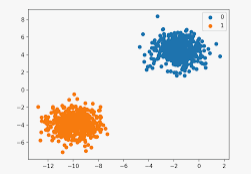

**Binary classification** is classification with two categories. [İkili sınıflandırma, iki kategorili sınıflandırmadır.] For example, we could label patients as non-diabetic or diabetic. [Örneğin, hastaları diyabetik olmayan veya diyabetik olarak etiketleyebiliriz.]

The class prediction is made by determining the probability for each possible class as a value between 0 -impossible - and 1 - certain. [Sınıf tahmini, olası her bir sınıf için olasılığın 0 -imkansız - ile 1 - kesin arasında bir değer olarak belirlenmesiyle yapılır.] The total probability for all classes is 1, as the patient is definitely either diabetic or non-diabetic. [Hasta kesinlikle diyabetik veya diyabetik olmadığı için tüm sınıflar için toplam olasılık 1'dir.] So, if the predicted probability of a patient being diabetic is 0.3, then there is a corresponding probability of 0.7 that the patient is non-diabetic. [Bu nedenle, bir hastanın diyabetik olma olasılığının tahmin edilen olasılığı 0,3 ise, hastanın diyabetik olmadığı yönünde 0,7'lik bir karşılık gelen olasılık vardır.]

A threshold value, usually 0.5, is used to determine the predicted class - so if the positive class (in this case, diabetic) has a predicted probability greater than the threshold, then a classification of diabetic is predicted. [Tahmin edilen sınıfı belirlemek için genellikle 0,5 olan bir eşik değeri kullanılır - bu nedenle pozitif sınıfın (bu durumda diyabetik) eşikten daha büyük bir tahmin olasılığı varsa, o zaman bir diyabetik sınıflandırması tahmin edilir.]

In [14]:
df.drop("customerid", axis = 1, inplace = True)

In [15]:
df.shape

(7043, 20)

- Second, the data type of the "totalcharges" column is object type. In order to benefit from this column in our analysis and modeling, we need to change it to numeric type.

- Data coding is always to be examined carefully.
- When we try to change the datatype of the Total charges from object type to float type, we will get error.
- Let's see what is the reason?

In [16]:
df.totalcharges.dtype

dtype('O')

In [17]:
df['totalcharges'][3826]

' '

In [18]:
df.iloc[3826]

gender                             Male
seniorcitizen                         0
partner                             Yes
dependents                          Yes
tenure                                0
phoneservice                        Yes
multiplelines                       Yes
internetservice                      No
onlinesecurity      No internet service
onlinebackup        No internet service
deviceprotection    No internet service
techsupport         No internet service
streamingtv         No internet service
streamingmovies     No internet service
contract                       Two year
paperlessbilling                     No
paymentmethod              Mailed check
monthlycharges                   25.350
totalcharges                           
churn                                No
Name: 3826, dtype: object

- Even though we don't see any missing values, when we look at the data, total charges feature has missing values.

Let's make the data type of the totalcharges column integer and make the correct coding to define missing values.

In [19]:
# df["totalcharges"].astype(float)

# ValueError: could not convert string to float: ''

In [20]:
# pd.to_numeric(df.totalcharges)

# ValueError: Unable to parse string " " at position 488

In [21]:
df.totalcharges[df.totalcharges.isin([" "])]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: totalcharges, dtype: object

In [22]:
df.totalcharges[df.totalcharges.isin([" "])].index.to_list()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [23]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges

0        29.850
1      1889.500
2       108.150
3      1840.750
4       151.650
         ...   
7038   1990.500
7039   7362.900
7040    346.450
7041    306.600
7042   6844.500
Name: totalcharges, Length: 7043, dtype: float64

In [24]:
df.totalcharges.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: totalcharges, dtype: float64

In [25]:
df['totalcharges'] = df['totalcharges'].apply(lambda x: x if x != ' ' else np.nan).astype(float)

In [26]:
df['totalcharges'].isnull().sum()

11

In [27]:
nan_index = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [28]:
len(df.totalcharges.iloc[nan_index])/len(df)

0.001561834445548772

Even though some models which we will use in this study can handle the missing values internally, let's fill them.

In [29]:
df['totalcharges'] = df['totalcharges'].fillna(df["totalcharges"].median())

In [30]:
df.duplicated().sum()

22

In [31]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [32]:
df.shape

(7021, 20)

## 5.2 Examination of Features and Target

After making basic examinations on the data set, let's continue our work by examining the columns one by one.

For this study, 'churn' represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

###  Target

In [33]:
target = 'churn'
# cprint(f'Have a first look to {target}:', 'red', 'on_white', attrs=['bold'])
summary(target)

Column:  churn
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
No     5164
Yes    1857
Name: churn, dtype: int64
****************************************************************************************************


In [34]:
df[target].value_counts().iplot(kind="bar")

- Let's encode target variable (churn) to numeric type.

In [35]:
df["churn"] = df["churn"].map({"No": 0, "Yes": 1})

In [36]:
# df["churn"] = [1 if i == "Yes" else 0 for i in df["churn"]]

In [37]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['churn'] = le.fit_transform(df['churn'])

In [38]:
df[target].value_counts()

0    5164
1    1857
Name: churn, dtype: int64

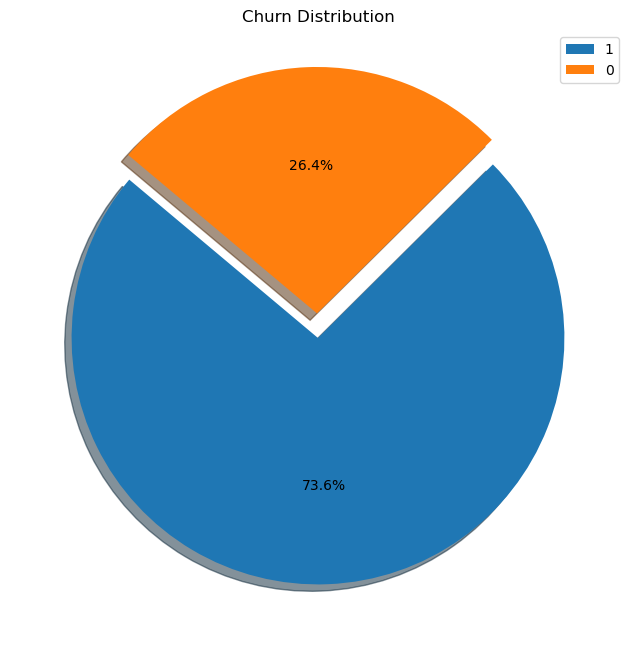

In [39]:
plt.figure(figsize = (8,8))

explode = [0,0.1]
plt.pie(df['churn'].value_counts(), 
        explode = explode,
        autopct = '%1.1f%%', 
        shadow = True,
        startangle = 140)
plt.legend(labels = ['1','0'])
plt.title('Churn Distribution')
plt.axis('off');

- We have imbalanced data.
- Almost 27% of the customers didn't continue with the company and churned.
- 1857 customer churned.
- Almost 73% of the customers continue with the company and didn't churn.
- 5164 customer didn't churn.

### Numerical - Categorical Features

For further usage, let's get the list of the numerical and categorical features.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   seniorcitizen     7021 non-null   int64  
 2   partner           7021 non-null   object 
 3   dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   phoneservice      7021 non-null   object 
 6   multiplelines     7021 non-null   object 
 7   internetservice   7021 non-null   object 
 8   onlinesecurity    7021 non-null   object 
 9   onlinebackup      7021 non-null   object 
 10  deviceprotection  7021 non-null   object 
 11  techsupport       7021 non-null   object 
 12  streamingtv       7021 non-null   object 
 13  streamingmovies   7021 non-null   object 
 14  contract          7021 non-null   object 
 15  paperlessbilling  7021 non-null   object 
 16  paymentmethod     7021 non-null   object 


In [41]:
num_cols = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [42]:
num_cols

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [43]:
cat_cols = df.drop(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], axis = 1).columns.to_list()

In [44]:
cat_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

### Numerical Features

In [45]:
df[num_cols].describe()

seniorcitizen   tenure  monthlycharges  totalcharges    churn
count       7021.000 7021.000        7021.000      7021.000 7021.000
mean           0.163   32.469          64.852      2288.954    0.264
std            0.369   24.535          30.069      2265.319    0.441
min            0.000    0.000          18.250        18.800    0.000
25%            0.000    9.000          35.750       411.150    0.000
50%            0.000   29.000          70.400      1400.550    0.000
75%            0.000   55.000          89.900      3801.700    1.000
max            1.000   72.000         118.750      8684.800    1.000

In [46]:
df[num_cols].iplot(kind = "histogram", 
                   subplots = True, 
                   bins = 50)

In [47]:
df[num_cols].iplot(kind = "box", 
                   subplots = True, 
                   boxpoints = "outliers")

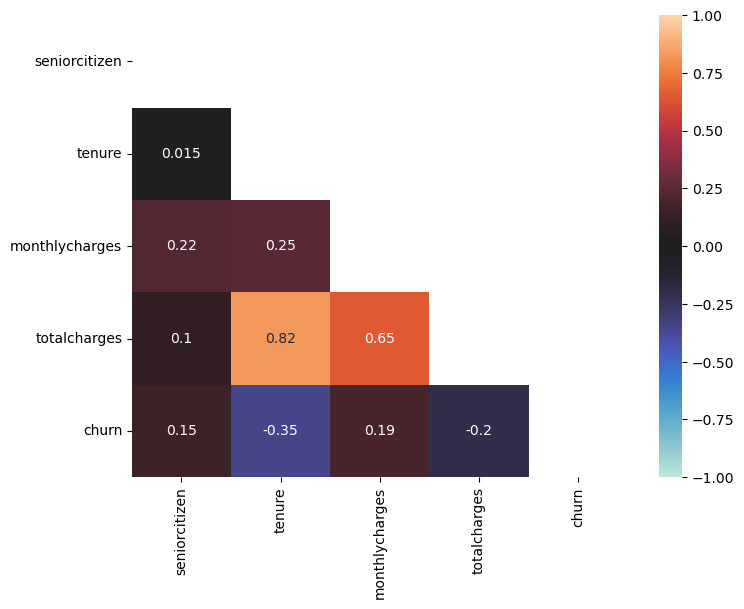

In [48]:
matrix = np.triu(df.corr())
fig,ax = plt.subplots(figsize = (8,6),dpi = 100)
sns.heatmap(df.corr(), 
            annot = True,
            ax = ax, 
            vmax = 1, 
            vmin = -1, 
            center = 0, 
            mask = matrix);

- Based on the matrix, we can observe weak level correlation between the numerical features and the target variable
- There is strong correlation between tenure and total charges.
- Being senior citizen and increasing monthly charges have a positive correlation with the churn.
- Senior citizen more likely churn than younger customers.
- Customer with higher monthly charges also more likely churn than lesser monthly charges customers.
- Being long term with the company, customer less likely churn than customer with lesser time with the company.
- Total charges has negative correlation with the churn.

In [49]:
df.skew()

# SeniorCitizen = yaşlı olup olmadıgı ( Müşterinin 65 veya daha büyük olup olmadığını gösterir: Evet, Hayır)
# tenure = Müşterilerin şirkette kaldığı ay sayısı
# MonthlyCharges = Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges = Müşterinin üç aylık dönem sonuna kadar hesaplanan toplam giderlerini gösterir.

seniorcitizen     1.830
tenure            0.236
monthlycharges   -0.224
totalcharges      0.960
churn             1.068
dtype: float64

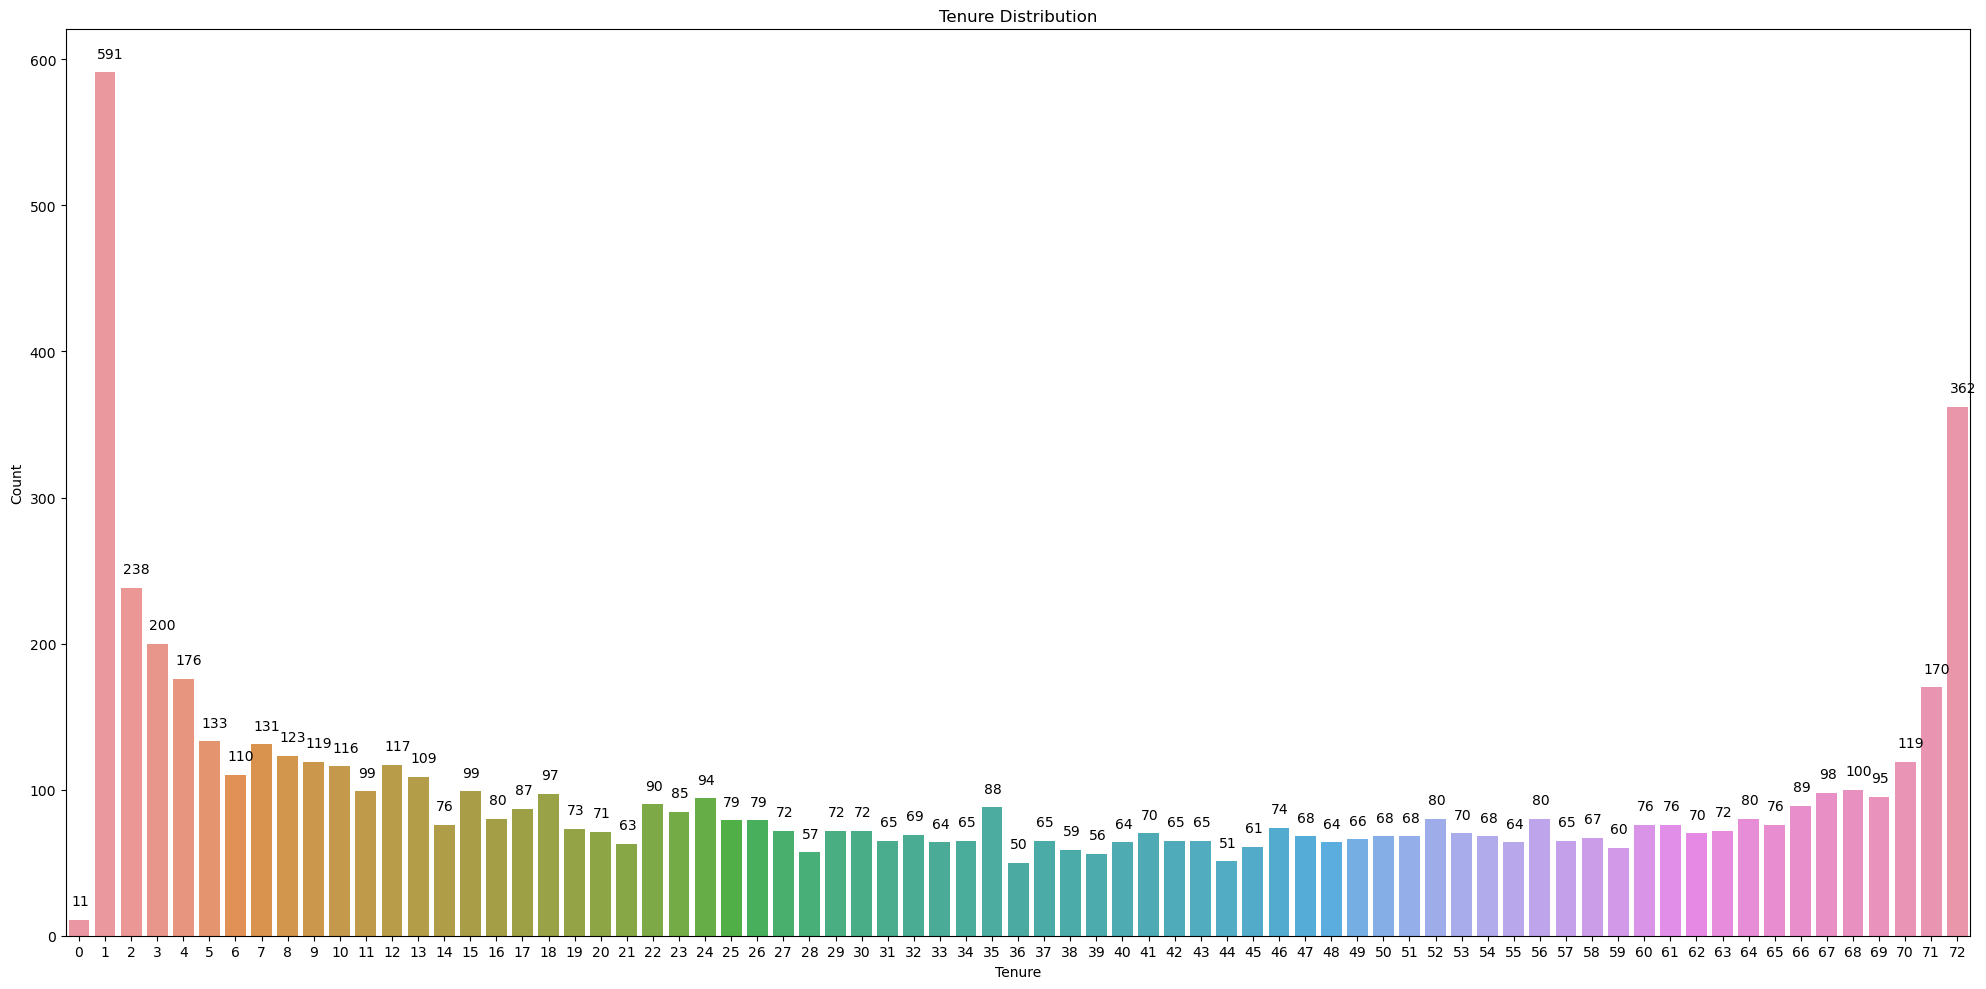

In [50]:
fig,ax = plt.subplots(figsize = (20,10),dpi = 100)
sns.countplot(x = df.tenure,
              data = df)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))
plt.tight_layout();

In [51]:
# yukarıda grafikte ilk ay kalanlar 591 kişi iken 2 ay kalan sayısı 238 olmustur. Ciddi bir düşüş var. 
# Şirket ilk iki ay kalanlara çeşitli promosyonlar vererek müşteriyi elinde tutabilir.

### Categorical Features

Let's see cardinality of the categorical features.

In [52]:
df[cat_cols].describe().T

count unique               top  freq
gender            7021      2              Male  3541
partner           7021      2                No  3619
dependents        7021      2                No  4911
phoneservice      7021      2               Yes  6339
multiplelines     7021      3                No  3368
internetservice   7021      3       Fiber optic  3090
onlinesecurity    7021      3                No  3490
onlinebackup      7021      3                No  3080
deviceprotection  7021      3                No  3087
techsupport       7021      3                No  3465
streamingtv       7021      3                No  2802
streamingmovies   7021      3                No  2777
contract          7021      3    Month-to-month  3853
paperlessbilling  7021      2               Yes  4161
paymentmethod     7021      4  Electronic check  2359

- Data does not have a high cardinality or zero variance issues.

- Let's see the unique values of the categorical features.

In [53]:
for feature in df[cat_cols]:
        print(f'{feature}: {df[feature].unique()}')

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No phone service' 'No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['No' 'Yes' 'No internet service']
streamingtv: ['No' 'Yes' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


- We can see that No internet service is repeating several times in the features and in this problem at hand, it gives same meaning as No
- So we can change them to No and then features will have two unique values,
- Also MultipleLines has No phone service option, which in this problem gives same meaning as No so we can change it to No and do the same thing for this feature.
- Lets'start with the bivariate analysis and on the way we will make the relevant changes.

#### Gender and Churn

In [54]:
px.histogram(df, 
             x = df.gender, 
             color = "churn")

<IPython.core.display.Javascript object>

In [55]:
pd.crosstab(df["gender"], df["churn"])

churn      0    1
gender           
Female  2546  934
Male    2618  923

In [56]:
print (f'A female customer has a probability of {round(df[df["gender"] == "Female"]["churn"].mean() * 100,2)} % churn')
print (f'A male customer has a probability of {round(df[df["gender"] == "Male"]["churn"].mean() * 100,2)} % churn')

A female customer has a probability of 26.84 % churn
A male customer has a probability of 26.07 % churn


In [57]:
pd.crosstab(df["gender"], df["churn"]).iplot(kind = "bar")

- There is not much difference between gender on the churn rate.

#### SeniorCitizen and Churn

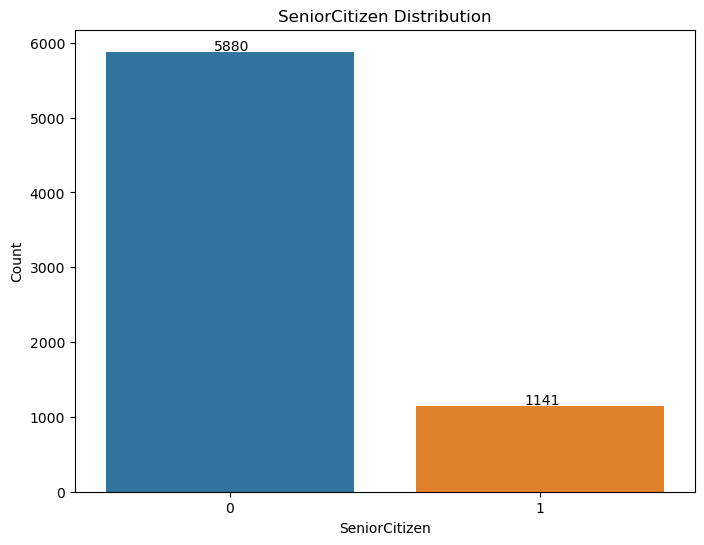

In [58]:
fig,ax = plt.subplots(figsize = (8,6), dpi = 100)
sns.countplot(x = df.seniorcitizen,
              data = df)
plt.title('SeniorCitizen Distribution')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() + 20));

In [59]:
df.seniorcitizen.value_counts(normalize = True) * 100

0   83.749
1   16.251
Name: seniorcitizen, dtype: float64

In [60]:
pd.crosstab(df["seniorcitizen"], df["churn"])

churn             0     1
seniorcitizen            
0              4498  1382
1               666   475

In [61]:
print (f'A customer who is 65 or older has a probability of {round(df[df["seniorcitizen"] == 1]["churn"].mean() * 100,2)} % churn')
print (f'A customer who is younger than 65 has a probability of {round(df[df["seniorcitizen"] == 0]["churn"].mean() * 100,2)} % churn')

A customer who is 65 or older has a probability of 41.63 % churn
A customer who is younger than 65 has a probability of 23.5 % churn


#### Partner and Churn

In [62]:
px.histogram(df, 
             x = df.partner, 
             color = "churn")

<IPython.core.display.Javascript object>

In [63]:
pd.crosstab(df["partner"], df["churn"])

churn       0     1
partner            
No       2431  1188
Yes      2733   669

In [64]:
pd.crosstab(df["partner"], df["churn"]).iplot(kind="bar")

In [65]:
print (f'A customer with a partner has a probability of {round(df[df["partner"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any partner has a probability of {round(df[df["partner"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a partner has a probability of 19.66 % churn
A customer without any partner has a probability of 32.83 % churn


- Customer without any relationship, single customer almost 1.7 times more likely to churn than customer with a partner.

#### Dependents and Churn

In [66]:
px.histogram(df, 
             x = df.dependents, 
             color = "churn")

# Müşterinin herhangi bir bakmakla yükümlü olduğu biriyle yaşayıp yaşamadığını gösterir:Depents ler çocuklar, ebeveynler, büyükanne ve büyükbabalar vb. dir.
# çocuklar, ebeveynler, büyükanne ve büyükbabalar vb. olmayanlar daha çok oranda ayrılmıslar.

<IPython.core.display.Javascript object>

In [67]:
px.histogram(df, 
             x = df.dependents, 
             color = "churn",
             facet_col = "contract")   

# çocuklar, ebeveynler, büyükanne ve büyükbabalar vb. olmayanlardan aylık kontrat yapanlar daha cok ayrılmıs.

<IPython.core.display.Javascript object>

In [68]:
pd.crosstab(df["dependents"], df["churn"])

churn          0     1
dependents            
No          3380  1531
Yes         1784   326

In [69]:
pd.crosstab(df["dependents"], df["churn"]).iplot(kind = "bar")

In [70]:
print (f'A customer with a dependents has a probability of {round(df[df["dependents"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any dependents has a probability of {round(df[df["dependents"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a dependents has a probability of 15.45 % churn
A customer without any dependents has a probability of 31.17 % churn


- Customer without any dependents, almost 2.03 times more likely to churn than customer with a dependent.

#### PhoneService and Churn

In [71]:
px.histogram(df, 
             x = df.phoneservice, 
             animation_frame = "seniorcitizen",
             color = "churn")    

# Müşterinin şirket ile ev telefonu hizmetine abone olup olmadığını gösterir

<IPython.core.display.Javascript object>

In [72]:
pd.crosstab(df["phoneservice"], df["churn"])

churn            0     1
phoneservice            
No             512   170
Yes           4652  1687

In [73]:
pd.crosstab(df["phoneservice"], df["churn"]).iplot(kind = "bar")

In [74]:
print (f'A customer with a PhoneService has a probability of {round(df[df["phoneservice"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any PhoneService has a probability of {round(df[df["phoneservice"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a PhoneService has a probability of 26.61 % churn
A customer without any PhoneService has a probability of 24.93 % churn


- Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small.

In [75]:
# https://plotly.com/python/animations/   Intro to Animations in Python

#### Multiple Lines and Churn

In [76]:
pd.crosstab(df["multiplelines"], df["churn"])

churn                0    1
multiplelines              
No                2531  837
No phone service   512  170
Yes               2121  850

In [77]:
df["multiplelines"] = df["multiplelines"].apply(lambda x:x if x == "Yes" else "No")

# Müşterinin birden fazla telefon hattına abone olup olmadığını gösterir: Evet, Hayır
# "No" ve "No phone service" aynı ibareler gibi duruyor. Onları birleştirelim.

In [78]:
pd.crosstab(df["multiplelines"], df["churn"])

churn             0     1
multiplelines            
No             3043  1007
Yes            2121   850

In [79]:
print (f'A customer with a MultipleLines has a probability of {round(df[df["multiplelines"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any MultipleLines has a probability of {round(df[df["multiplelines"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a MultipleLines has a probability of 28.61 % churn
A customer without any MultipleLines has a probability of 24.86 % churn


- Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.

#### InternetService and Churn

In [80]:
pd.crosstab(df["internetservice"], df["churn"])

churn               0     1
internetservice            
DSL              1962   457
Fiber optic      1799  1291
No               1403   109

In [81]:
pd.crosstab(df["internetservice"], df["churn"]).iplot(kind = "bar")

In [82]:
print (f'A customer with a DSL internet service has a probability of {round(df[df["internetservice"] == "DSL"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a Fiber optic internet service has a probability of {round(df[df["internetservice"] == "Fiber optic"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any internet service has a probability of {round(df[df["internetservice"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a DSL internet service has a probability of 18.89 % churn
A customer with a Fiber optic internet service has a probability of 41.78 % churn
A customer without any internet service has a probability of 7.21 % churn


- Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.
- Customer with fiber optic internet with the company compare to customer with DSL internet service with the company almost 2.21 times more likely to churn.
- Customer with DSL internet service with the company compare to customer without any internet service with the company 2.56 times more likley to churn.

#### Online Security and Churn

In [83]:
pd.crosstab(df["onlinesecurity"], df["churn"])

churn                   0     1
onlinesecurity                 
No                   2037  1453
No internet service  1403   109
Yes                  1724   295

In [84]:
df["onlinesecurity"] = df["onlinesecurity"].apply(lambda x:x if x == "Yes" else "No")

# Müşterinin şirket tarafından sağlanan ek bir çevrimiçi güvenlik hizmetine abone olup olmadığını gösterir.Acıklama kısmında Evet, Hayır var sadece
# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.

In [85]:
pd.crosstab(df["onlinesecurity"], df["churn"])

churn              0     1
onlinesecurity            
No              3440  1562
Yes             1724   295

In [86]:
print (f'A customer with a OnlineSecurity has a probability of {round(df[df["onlinesecurity"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any OnlineSecurity has a probability of {round(df[df["onlinesecurity"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a OnlineSecurity has a probability of 14.61 % churn
A customer without any OnlineSecurity has a probability of 31.23 % churn


- A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.

#### OnlineBackup and Churn

In [87]:
pd.crosstab(df["onlinebackup"], df["churn"]).iplot(kind = "bar")

In [88]:
pd.crosstab(df["onlinebackup"], df["churn"])

churn                   0     1
onlinebackup                   
No                   1855  1225
No internet service  1403   109
Yes                  1906   523

In [89]:
df["onlinebackup"] = df["onlinebackup"].apply(lambda x:x if x == "Yes" else "No")

# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.
# Müşterinin şirket tarafından sağlanan ek bir çevrimiçi yedekleme hizmetine abone olup olmadığını gösterir: Evet, Hayır

In [90]:
pd.crosstab(df["onlinebackup"], df["churn"])

churn            0     1
onlinebackup            
No            3258  1334
Yes           1906   523

In [91]:
pd.crosstab(df["onlinebackup"], df["churn"]).iplot(kind = "bar")

In [92]:
print (f'A customer with a OnlineBackup has a probability of {round(df[df["onlinebackup"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any OnlineBackup has a probability of {round(df[df["onlinebackup"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a OnlineBackup has a probability of 21.53 % churn
A customer without any OnlineBackup has a probability of 29.05 % churn


- A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.

#### DeviceProtection and Churn

In [93]:
pd.crosstab(df["deviceprotection"], df["churn"])

churn                   0     1
deviceprotection               
No                   1884  1203
No internet service  1403   109
Yes                  1877   545

In [94]:
df["deviceprotection"] = df["deviceprotection"].apply(lambda x:x if x == "Yes" else "No")

# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.

In [95]:
pd.crosstab(df["deviceprotection"], df["churn"])

churn                0     1
deviceprotection            
No                3287  1312
Yes               1877   545

In [96]:
print (f'A customer with a DeviceProtection has a probability of {round(df[df["deviceprotection"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any DeviceProtection has a probability of {round(df[df["deviceprotection"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a DeviceProtection has a probability of 22.5 % churn
A customer without any DeviceProtection has a probability of 28.53 % churn


In [97]:
pd.crosstab(df["deviceprotection"], df["churn"]).iplot(kind = "bar")

- A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.

#### TechSupport and Churn

In [98]:
px.histogram(df, 
             x = df.techsupport, 
             color = "churn")

# Teknik destek almayanlar diğerlerine göre daha fazla ayrılmış

<IPython.core.display.Javascript object>

In [99]:
pd.crosstab(df["techsupport"], df["churn"])

churn                   0     1
techsupport                    
No                   2027  1438
No internet service  1403   109
Yes                  1734   310

In [100]:
# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.
df["techsupport"] = df["techsupport"].apply(lambda x:x if x == "Yes" else "No")

In [101]:
pd.crosstab(df["techsupport"], df["churn"])

churn           0     1
techsupport            
No           3430  1547
Yes          1734   310

In [102]:
print (f'A customer with a TechSupport has a probability of {round(df[df["techsupport"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any TechSupport has a probability of {round(df[df["techsupport"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a TechSupport has a probability of 15.17 % churn
A customer without any TechSupport has a probability of 31.08 % churn


In [103]:
pd.crosstab(df["techsupport"], df["churn"]).iplot(kind = "bar")

- A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.

#### StreamingTV and Churn

In [104]:
pd.crosstab(df["streamingtv"], df["churn"])

churn                   0    1
streamingtv                   
No                   1868  934
No internet service  1403  109
Yes                  1893  814

In [105]:
# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.
df["streamingtv"] = df["streamingtv"].apply(lambda x:x if x == "Yes" else "No")

In [106]:
pd.crosstab(df["streamingtv"], df["churn"])

churn           0     1
streamingtv            
No           3271  1043
Yes          1893   814

In [107]:
print (f'A customer with a StreamingTV has a probability of {round(df[df["streamingtv"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any StreamingTV has a probability of {round(df[df["streamingtv"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a StreamingTV has a probability of 30.07 % churn
A customer without any StreamingTV has a probability of 24.18 % churn


- A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.

#### StreamingMovies and Churn

In [108]:
pd.crosstab(df["streamingmovies"], df["churn"])

churn                   0    1
streamingmovies               
No                   1847  930
No internet service  1403  109
Yes                  1914  818

In [109]:
# "No" ve "No internet service" aynı ibareler gibi duruyor. Onları birleştirelim.
df["streamingmovies"] = df["streamingmovies"].apply(lambda x:x if x == "Yes" else "No")

In [110]:
pd.crosstab(df["streamingmovies"], df["churn"])

churn               0     1
streamingmovies            
No               3250  1039
Yes              1914   818

In [111]:
pd.crosstab(df["streamingmovies"], df["churn"]).iplot(kind = "bar")

In [112]:
print (f'A customer with a StreamingMovies has a probability of {round(df[df["streamingmovies"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without any StreamingMovies has a probability of {round(df[df["streamingmovies"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a StreamingMovies has a probability of 29.94 % churn
A customer without any StreamingMovies has a probability of 24.22 % churn


- A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.

#### Contract and Churn

In [113]:
px.histogram(df, 
             x = df.contract,
             animation_frame = df.seniorcitizen, 
             facet_col = "churn")

<IPython.core.display.Javascript object>

In [114]:
pd.crosstab(df["contract"], df["churn"])

churn              0     1
contract                  
Month-to-month  2210  1643
One year        1307   166
Two year        1647    48

In [115]:
pd.crosstab(df["contract"], df["churn"]).iplot(kind = "bar")

In [116]:
print (f'A customer with a Month-to-month contract has a probability of {round(df[df["contract"] == "Month-to-month"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a One year contract has a probability of {round(df[df["contract"] == "One year"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a Two year contract has a probability of {round(df[df["contract"] == "Two year"]["churn"].mean() * 100,2)} % churn')

A customer with a Month-to-month contract has a probability of 42.64 % churn
A customer with a One year contract has a probability of 11.27 % churn
A customer with a Two year contract has a probability of 2.83 % churn


- Great differences based on the contract were seen in the histogram and mean differences.
- Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
- On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.

#### PaperlessBilling and Churn

In [117]:
df["paperlessbilling"].value_counts()

Yes    4161
No     2860
Name: paperlessbilling, dtype: int64

In [118]:
pd.crosstab(df["paperlessbilling"], df["churn"])

churn                0     1
paperlessbilling            
No                2394   466
Yes               2770  1391

In [119]:
pd.crosstab(df["paperlessbilling"], df["churn"]).iplot(kind="bar")

In [120]:
print (f'A customer with a PaperlessBilling has a probability of {round(df[df["paperlessbilling"] == "Yes"]["churn"].mean() * 100,2)} % churn')
print (f'A customer without a PaperlessBilling has a probability of {round(df[df["paperlessbilling"] == "No"]["churn"].mean() * 100,2)} % churn')

A customer with a PaperlessBilling has a probability of 33.43 % churn
A customer without a PaperlessBilling has a probability of 16.29 % churn


- A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.

#### PaymentMethod and Churn

In [121]:
px.histogram(df, 
             x = df.paymentmethod, 
             color = "churn",
             facet_col = "gender")

#  electronic ödeme yapanlar diğerlerine oranla daha fazla sayıda ayrılmıs ve cinsiyet etkili olmamıs

<IPython.core.display.Javascript object>

In [122]:
pd.crosstab(df["paymentmethod"], df["churn"])

churn                         0     1
paymentmethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1065
Mailed check               1294   302

In [123]:
pd.crosstab(df["paymentmethod"], df["churn"]).iplot(kind = "bar")

In [124]:
print (f'A customer with a Payment method as a Bank transfer (automatic) has a probability of {round(df[df["paymentmethod"] == "Bank transfer (automatic)"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a Payment method as a Credit card (automatic) has a probability of {round(df[df["paymentmethod"] == "Credit card (automatic)"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a Payment method as a Electornic Check has a probability of {round(df[df["paymentmethod"] == "Electronic check"]["churn"].mean() * 100,2)} % churn')
print (f'A customer with a Payment method as a Mailed Check has a probability of {round(df[df["paymentmethod"] == "Mailed check"]["churn"].mean() * 100,2)} % churn')

A customer with a Payment method as a Bank transfer (automatic) has a probability of 16.71 % churn
A customer with a Payment method as a Credit card (automatic) has a probability of 15.24 % churn
A customer with a Payment method as a Electornic Check has a probability of 45.15 % churn
A customer with a Payment method as a Mailed Check has a probability of 18.92 % churn


- Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.

**Overall Insights**


- Gender : There is not much difference between gender on the churn rate. We won't include gender into our model.
- Partner : Customer without any relationship, single customer almost 1.7 times more likely churn than cutomer with a partner.
- Dependents : Customer without any dependents, almost 2.03 times more likely churn than cutomer with a dependent.
- Phone Service: Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small. We won't include phone service into our model.
- Multiple Lines : Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.
- Internet Service : Customer with fiber optic internet with the company compare to customer without any internet service with the company 5.66 times more likely to churn.
- Online Security: A customer with an online security service with the company almost 2.14 times less likely to leave the company than a customer without any online security service with the company.
- Online Backup A customer with an online backup service with the company almost 1.35 times less likely to leave the company than a customer without any online backup service with the company.
- Device Protection : A customer with a device protection service with the company almost 1.27 times less likely to leave the company than a customer without any a device protection service with the company.
- Tech Support : A customer with a Tech Support service with the company almost 2.06 times less likely to leave the company than a customer without any a Tech Support service with the company.
- Streaming TV Service : A customer with a Streaming TV service with the company almost 1.24 times more likely to leave the company than a customer without any a Streaming TV service with the company.
- Streaming Movies Service : A customer with a Streaming Movies service with the company almost 1.23 times more likely to leave the company than a customer without any a Streaming movies service with the company.
- Contract Type : Great differences based on the contract were seen in the histogram and mean differences.
Customer with the 2 year contract almost 15.1 times less likely to churn compare to customer with a monthly contract.
On the other hand customer with the 1 year contract almost 3.79 times less likely to churn compare to customer with a monthly contract.
- Paperless Billing : A customer with a paperless billing with the company almost 2.06 times more likely to leave the company than a customer without a paperless billing with the company.
- Payment Method : Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.

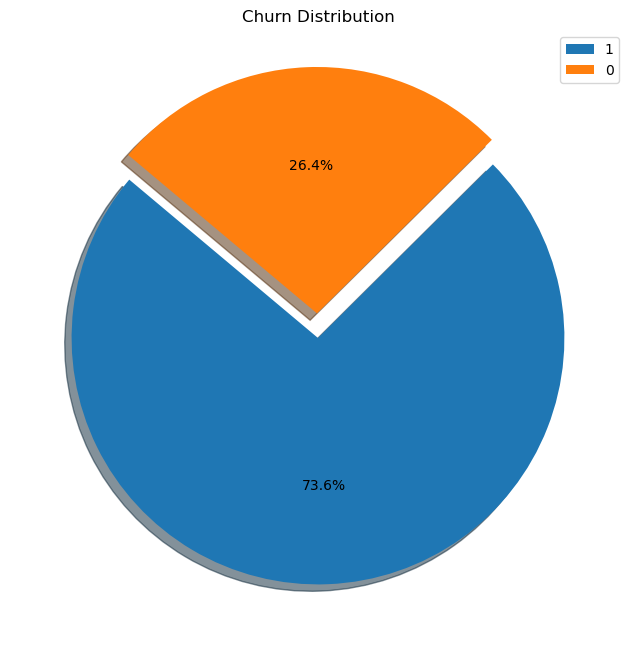

In [125]:
plt.figure(figsize = (8,8))

explode = [0, 0.1]
plt.pie(df['churn'].value_counts(), 
        explode = explode,
        autopct = '%1.1f%%', 
        shadow = True,
        startangle  =140)
plt.legend(labels = ['1', '0'])
plt.title('Churn Distribution')
plt.axis('off');

# 6. Modelling with Pycaret

**What is PyCaret**

- PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. 
- It is an end-to-end machine learning and model management tool.
- PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and and many more.
- With PyCaret, you spend less time coding and more time on analysis.
- PyCaret is simple and easy to use. All the operations performed in PyCaret are sequentially stored in a pipeline that is fully orchestrated for deployment. Whether it’s imputing missing values, transforming categorical data, feature engineering, or even hyperparameter tuning, PyCaret automates all of it. 

In [ ]:
# install pycaret 

# !pip install pycaret

In [133]:
# import the classification module 

from pycaret import classification

# import the classification module 

from pycaret.classification import *

**Initializing the Setup**

PyCaret performs some basic preprocessing tasks, like ignoring the IDs and Date Columns, imputing the missing values, encoding the categorical variables, and splitting the dataset into the train-test split for the rest of the modeling steps. When you run the setup function, it will first confirm the data types, and then if you press enter, it will create the environment for you to go ahead and in the end gives overall picture of data.

In [134]:
classification_setup = classification.setup(data = df, target = 'churn', session_id = 123)

**Compare Models**

After setup, transformed data is available for model training. You can start the training process with the **compare_models** function. It will train all the algorithms available in the model zoo and evaluate multiple performance metrics using k-fold cross-validation.

In [129]:
best_model = compare_models()

**Training a Model**

Training a model in PyCaret is quite simple. You just need to use the **create_model** function that takes just the one parameter – the model abbreviation as a string. Here, we are going to first train a Random Forest model for which we have to pass “rf” and it will return a table with k-fold cross-validated scores of common evaluation metrics used for classification models.

In [136]:
classification_rf = classification.create_model('rf')

**Hyperparameter Tuning**

We can tune the hyperparameters of a machine learning model by just using the **tune_model** function which takes one parameter – the model abbreviation string (the same as we used in the create_model function).

PyCaret provides us a lot of flexibility. For example, we can define the number of folds using the fold parameter within the tune_model function. Or we can change the number of iterations using the n_iter parameter. Increasing the n_iter parameter will obviously increase the training time but will give a much better performance.

In [141]:
tuned_rf = classification.tune_model(classification_rf)

**Plot Model Results**

You can plot model results by providing the model object as the parameter and the type of plot you want.

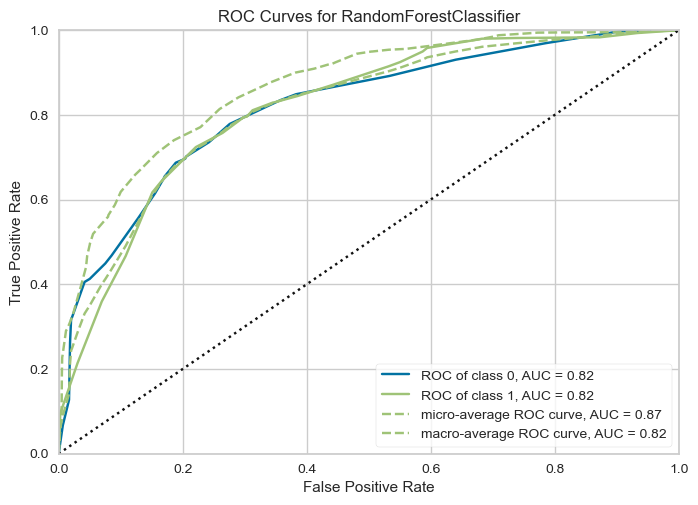

In [142]:
# AUC-ROC plot

classification.plot_model(tuned_rf, plot = 'auc')

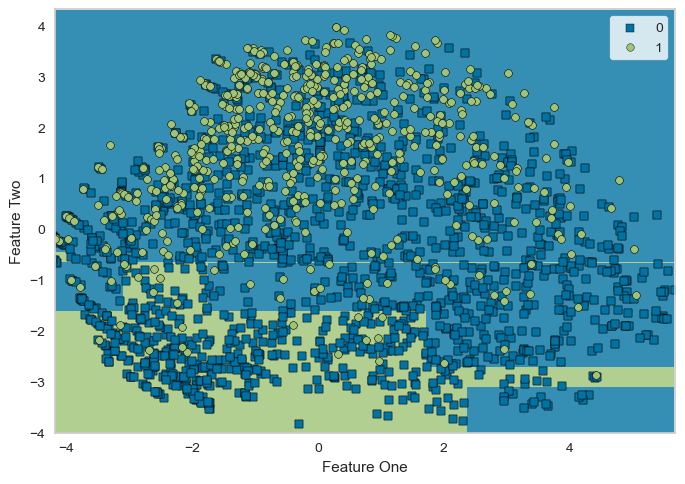

In [143]:
# Decision Boundary

classification.plot_model(tuned_rf, plot = 'boundary')

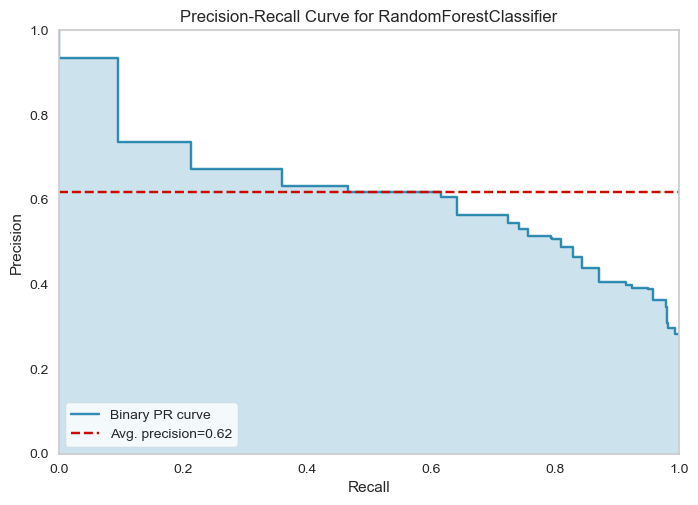

In [144]:
# Precision Recall Curve

classification.plot_model(tuned_rf, plot = 'pr')

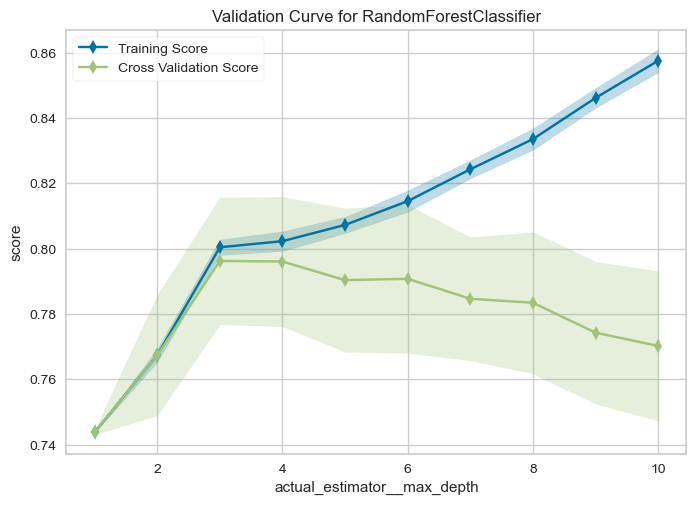

In [145]:
# Validation Curve

classification.plot_model(tuned_rf, plot = 'vc')

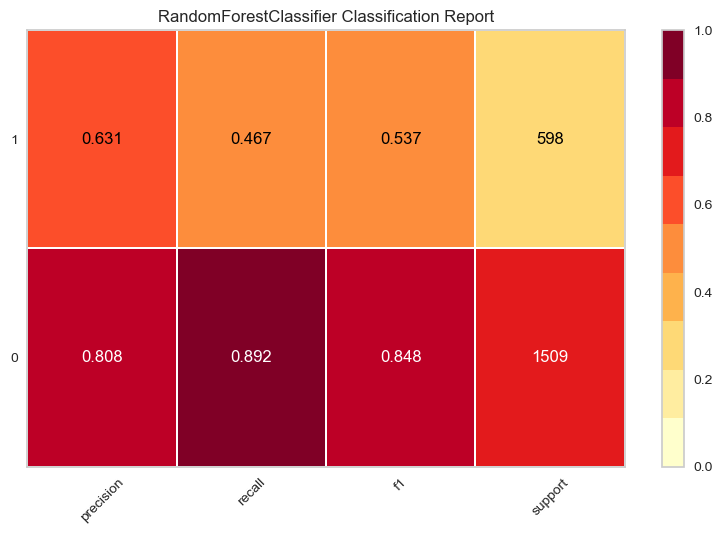

In [154]:
classification.plot_model(tuned_rf, plot = 'class_report')

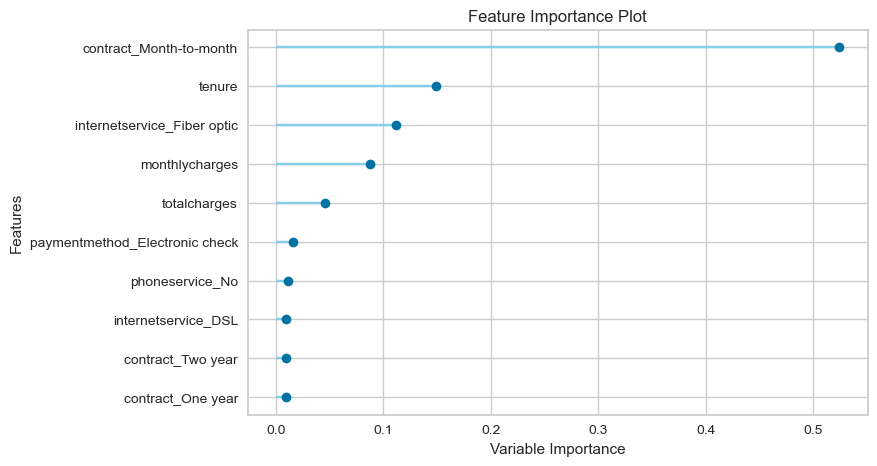

In [152]:
classification.plot_model(tuned_rf, plot = "feature")

**Evaluate our Model**

If you do not want to plot all these visualizations individually, then the PyCaret library has another amazing function – evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways.

In [147]:
# evaluate model

classification.evaluate_model(tuned_rf)

Parameters
bootstrap                     False
ccp_alpha                       0.0
class_weight                     {}
criterion                   entropy
max_depth                         5
max_features                    1.0
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease        0.0002
min_impurity_split             None
min_samples_leaf                  5
min_samples_split                10
min_weight_fraction_leaf        0.0
n_estimators                    150
n_jobs                           -1
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

# 7. Machine Learning Classification

**Classification**

**Supervised machine learning** techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. [Denetimli makine öğrenimi teknikleri, bir modelin bir dizi özellik üzerinde çalışması ve önceden bilinen bazı etiket değerlerini içeren bir veri kümesini kullanarak bir etiketi tahmin etmesi için eğitilmesini içerir.] You can think of this function like this, in which y represents the label we want to predict and X represents the vector of features the model uses to predict it. [Bu işlevi şu şekilde düşünebilirsiniz; burada y, tahmin etmek istediğimiz etiketi temsil eder ve X, modelin onu tahmin etmek için kullandığı özniteliklerin vektörünü temsil eder.]

y = f([x1, x2, x3,...])

**Classification** is a form of supervised machine learning in which you train a model to use the features (the x values in our function) to predict a label (y) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label. [Sınıflandırma, bir dizi olası sınıfın her birine ait gözlenen durumun olasılığını hesaplayan bir etiket (y) tahmin etmek için özellikleri (fonksiyonumuzdaki x değerleri) kullanmak üzere bir modeli eğittiğiniz bir denetimli makine öğrenimi biçimidir. ve uygun bir etiketin tahmin edilmesi.] 

The simplest form of classification is **binary classification**, in which the label is 0 or 1, representing one of two classes; for example, "True" or "False"; "Internal" or "External"; "Profitable" or "Non-Profitable"; and so on. [En basit sınıflandırma biçimi, iki sınıftan birini temsil eden etiketin 0 veya 1 olduğu ikili sınıflandırmadır; örneğin, 'Doğru' veya 'Yanlış'; 'Dahili veya harici'; 'Karlı' veya 'Kar Amacı Gütmeyen'; ve bunun gibi.]

In this notebook, we will focus on an example of binary classification, where the model must predict a label that belongs to one of two classes. [Bu not defterinde, modelin iki sınıftan birine ait bir etiketi tahmin etmesi gereken bir ikili sınıflandırma örneğine odaklanacağız.] We'll train a binary classifier to predict whether or not a subscriber will churn or not based on information the company has about subscribers. [Şirketin aboneler hakkında sahip olduğu bilgilere dayanarak bir abonenin çalışıp çalışmayacağını tahmin etmek için bir ikili sınıflandırıcı eğiteceğiz.]

## 7.1 Data Preprocessing 

### 7.1.1 Features and target variable

A classification algorithm is used to fit a subset of the data to a function that can calculate the probability for each class label from the feature values. [Verilerin bir alt kümesini, özellik değerlerinden her sınıf etiketi için olasılığı hesaplayabilen bir fonksiyona sığdırmak için bir sınıflandırma algoritması kullanılır.] The remaining data is used to evaluate the model by comparing the predictions it generates from the features to the known class labels. [Kalan veriler, özelliklerden ürettiği tahminleri bilinen sınıf etiketleriyle karşılaştırarak modeli değerlendirmek için kullanılır.]


Let's separate the features from the labels - we'll call the features X and the label y:

In [131]:
# Separate features and labels

X = df.drop("churn", axis=1)
y = df["churn"]

In [132]:
print(X.shape)
print()
print(y.shape)

(7021, 19)

(7021,)


### 7.1.2 Train-Test Split

**Split the data**

Our dataset includes known values for the label, so we can use this to train a classifier so that it finds a statistical relationship between the features and the label value; but how will we know if our model is any good? [Veri kümemiz, etiket için bilinen değerleri içerir, bu nedenle, özellikler ve etiket değeri arasında istatistiksel bir ilişki bulması için bir sınıflandırıcıyı eğitmek için bunu kullanabiliriz; ama modelimizin iyi olup olmadığını nasıl bileceğiz?] How do we know it will predict correctly when we use it with new data that it wasn't trained with? [Eğitilmediği yeni verilerle kullandığımızda doğru tahmin yapacağını nasıl bileceğiz?] Well, we can take advantage of the fact we have a large dataset with known label values, use only some of it to train the model, and hold back some to test the trained model - enabling us to compare the predicted labels with the already known labels in the test set. [Bilinen etiket değerlerine sahip büyük bir veri kümemiz olduğu gerçeğinden yararlanabilir, modeli eğitmek için yalnızca bir kısmını kullanabilir ve eğitilmiş modeli test etmek için bazılarını geri tutabiliriz - bu, tahmin edilen etiketleri zaten bilinenlerle karşılaştırmamızı sağlar. test setindeki etiketler.]

In Python, the scikit-learn package contains a large number of functions we can use to build a machine learning model - including a train_test_split function that ensures we get a statistically random split of training and test data. [Python'da, scikit-learn paketi, bir makine öğrenimi modeli oluşturmak için kullanabileceğimiz çok sayıda işlevi içerir - eğitim ve test verilerinin istatistiksel olarak rastgele bölünmesini sağlayan bir train_test_split işlevi dahil.] We'll use that to split the data into 70% for training and hold back 30% for testing. [Bunu, verileri eğitim için %70'e bölmek ve test için %30'unu tutmak için kullanacağız.]

In [133]:
# sklearn library for data preprocessing

from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    stratify = y, 
                                                    random_state = 101)

In [135]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    3614
1    1300
Name: churn, dtype: int64

0    1550
1     557
Name: churn, dtype: int64


In [136]:
print(y_train.value_counts(normalize = True))
print()
print(y_test.value_counts(normalize = True))

0   0.735
1   0.265
Name: churn, dtype: float64

0   0.736
1   0.264
Name: churn, dtype: float64


### 7.1.3 Metric Selection

- Based on the data and data dictionary, We have a classification problem.
- We wil make classification on the target variable **Churn**
- We will build a model to get best classification possible on the target variable.
- For that we will look at the balance of the target variable.
- Our target variable has imbalanced data.
- For that reason we are not going to use Accuracy score,
- Based on the problem on the hand, we will use **Recall score**

In [137]:
df["churn"].value_counts()

#Şirketten ayrılıp ayrılmadıklarını gösterir. Target sutundur.

0    5164
1    1857
Name: churn, dtype: int64

In [138]:
df["churn"].value_counts(normalize = True)

0   0.736
1   0.264
Name: churn, dtype: float64

In [139]:
df["churn"].value_counts().iplot(kind = "bar")

- Imbalanced bir dataya sahibiz. Accuracy score kullanmamalıyız. False negative sayısını olabildiğince düşürmek istediğimiz için Recall metriğini kullanacağız.

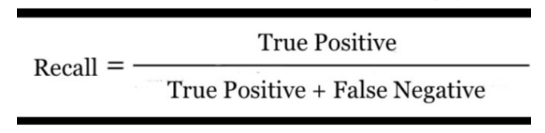

# 8. Logistic Regression

## 8.1 Model Building with Pipeline

OK, now we're ready to train our model by fitting the training features (X_train) to the training labels (y_train). [Tamam, şimdi eğitim özelliklerini (X_train) eğitim etiketlerine (y_train) uydurarak modelimizi eğitmeye hazırız.] There are various algorithms we can use to train the model. [Modeli eğitmek için kullanabileceğimiz çeşitli algoritmalar var.] We'll use Logistic Regression, which (despite its name) is a well-established algorithm for classification. [Bu örnekte, (ismine rağmen) iyi kurulmuş bir sınıflandırma algoritması olan Lojistik Regresyon'u kullanacağız.]

**Note**: Parameters for machine learning algorithms are generally referred to as hyperparameters (to a data scientist, parameters are values in the data itself - hyperparameters are defined externally from the data!) [Not: Makine öğrenimi algoritmalarına ilişkin parametrelere genellikle hiperparametreler denir (bir veri bilimcisi için parametreler, verilerin kendi içindeki değerlerdir - hiperparametreler, verilerden harici olarak tanımlanır!)]

In [161]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False, 
                    handle_unknown = 'error', 
                    drop = "first")

column_trans = ColumnTransformer([("ohe", ohe, cat_cols)], remainder = "passthrough")

# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler() # will be used in the pipelines

In [162]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [163]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("logistic", LogisticRegression(random_state = 101))]

pipe_log = Pipeline(steps=operations)

pipe_log.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## 8.2 Model Performance

Now we've trained the model using the training data, we can use the test data we held back to evaluate how well it predicts. [Şimdi eğitim verilerini kullanarak modeli eğittik, ne kadar iyi tahmin ettiğini değerlendirmek için geride tuttuğumuz test verilerini kullanabiliriz.] Again, scikit-learn can help us do this. [Yine, scikit-learn bunu yapmamıza yardımcı olabilir.] Let's start by using the model to predict labels for our test set, and compare the predicted labels to the known labels: [Test setimiz için etiketleri tahmin etmek için modeli kullanarak başlayalım ve tahmin edilen etiketleri bilinen etiketlerle karşılaştıralım:]

In [164]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

In [165]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred),
                            "roc_auc" : roc_auc_score(y_train, y_train_pred),
                            "recall_auc" : auc(recall, precision)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred),
                           "roc_auc" : roc_auc_score(y_test, y_pred),
                           "recall_auc" : auc(recall, precision)}}
    
    return pd.DataFrame(scores)

In [166]:
# sklearn library for machine learning algorithms, data preprocessing, and evaluation

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import make_scorer, auc, log_loss

# yellowbrick library for visualizing the model performance

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

Test_Set
[[1398  152]
 [ 271  286]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1550
           1       0.65      0.51      0.57       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3253  361]
 [ 572  728]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3614
           1       0.67      0.56      0.61      1300

    accuracy                           0.81      4914
   macro avg       0.76      0.73      0.74      4914
weighted avg       0.80      0.81      0.80      4914



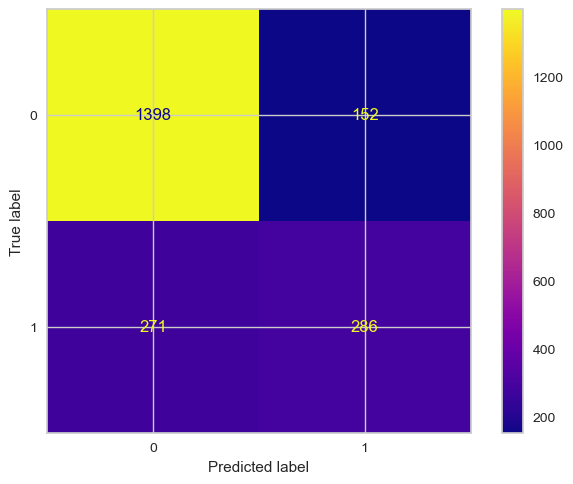

In [167]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.

y_pred = pipe_log.predict(X_test)
y_train_pred = pipe_log.predict(X_train)
y_pred_proba = pipe_log.predict_proba(X_test)

eval_metric(pipe_log, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [168]:
LogReg_model_f1 = f1_score(y_test, y_pred)
LogReg_model_acc = accuracy_score(y_test, y_pred)
LogReg_model_recall = recall_score(y_test, y_pred)
LogReg_model_auc = roc_auc_score(y_test, y_pred)
LogReg_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
LogReg_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.810     0.799
Precision       0.669     0.653
Recall          0.560     0.513
f1              0.609     0.575
roc_auc         0.730     0.708
recall_auc      0.648     0.648

## 8.3 Cross Validation

In [169]:
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

In [170]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("logistic", LogisticRegression(random_state = 101))]

pipe_log_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_log_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score =  "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.808
train_accuracy    0.810
test_precision    0.667
train_precision   0.667
test_recall       0.554
train_recall      0.560
test_f1           0.604
train_f1          0.609
dtype: float64

## 8.4 GridSearchCV

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("logistic", LogisticRegression(random_state = 101))]

# pipeline for logistic regression
pipe_log_gs = Pipeline(steps = operations)

# pipe_log_gs.get_params()

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20) 

# balanced: class weights are balanced, None: no class weights
class_weight = ['balanced', None] 

# to get 4 values of solver
solver = ["lbfgs", "saga"] 

# to get all the combinations of penalty, C, class_weight and solver
param_grid = {'logistic__penalty'      : penalty,
              'logistic__C'            : [C,1],
              'logistic__class_weight' : class_weight,
              'logistic__solver'       : solver} 

# to get the best model
log_grid_model = GridSearchCV(estimator = pipe_log_gs,
                              param_grid = param_grid,
                              cv = 10,
                              scoring = 'recall',       
                              n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators :', log_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters :', log_grid_model.best_params_) 

****************************************************************************************************
Best Estimators : Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
   

In [173]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("logistic", LogisticRegression(C = 1.0,
                                              class_weight = 'balanced',
                                              penalty = 'l1', 
                                              solver = 'saga',
                                              random_state = 101))]

log_tuned = Pipeline(steps=operations)

log_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1135  415]
 [ 119  438]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1550
           1       0.51      0.79      0.62       557

    accuracy                           0.75      2107
   macro avg       0.71      0.76      0.72      2107
weighted avg       0.80      0.75      0.76      2107


Train_Set
[[2644  970]
 [ 249 1051]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3614
           1       0.52      0.81      0.63      1300

    accuracy                           0.75      4914
   macro avg       0.72      0.77      0.72      4914
weighted avg       0.81      0.75      0.77      4914



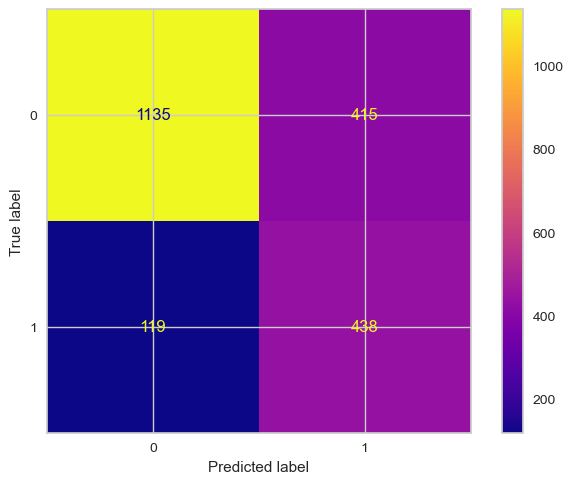

In [174]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = log_tuned.predict(X_test)
y_train_pred = log_tuned.predict(X_train)
y_pred_proba = log_tuned.predict_proba(X_test)

eval_metric(log_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [175]:
log_tuned_f1 = f1_score(y_test, y_pred)
log_tuned_acc = accuracy_score(y_test, y_pred)
log_tuned_recall = recall_score(y_test, y_pred)
log_tuned_auc = roc_auc_score(y_test, y_pred)
log_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
log_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.752     0.747
Precision       0.520     0.513
Recall          0.808     0.786
f1              0.633     0.621
roc_auc         0.770     0.759
recall_auc      0.678     0.678

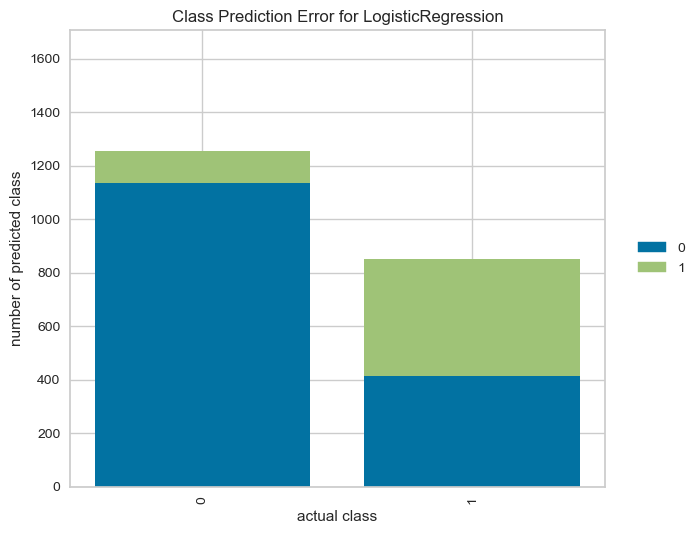

In [176]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(log_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

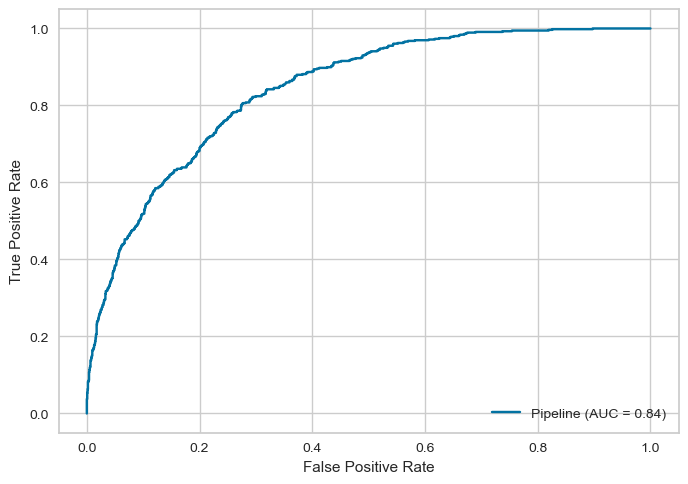

In [177]:
plot_roc_curve(log_tuned, X_test, y_test);

In [178]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

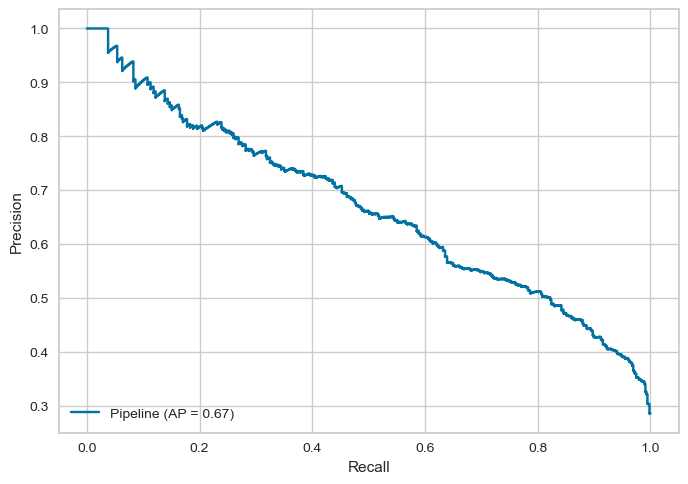

In [179]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(log_tuned, X_test, y_test);

In [180]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# K-Nearest Neighbors(KNN)

## Model Building with Pipeline

In [181]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.neighbors import KNeighborsClassifier

In [182]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("knn", KNeighborsClassifier(n_neighbors = 5))]

pipe_knn = Pipeline(steps = operations)

pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1324  226]
 [ 274  283]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1550
           1       0.56      0.51      0.53       557

    accuracy                           0.76      2107
   macro avg       0.69      0.68      0.69      2107
weighted avg       0.76      0.76      0.76      2107


Train_Set
[[3261  353]
 [ 449  851]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3614
           1       0.71      0.65      0.68      1300

    accuracy                           0.84      4914
   macro avg       0.79      0.78      0.79      4914
weighted avg       0.83      0.84      0.83      4914



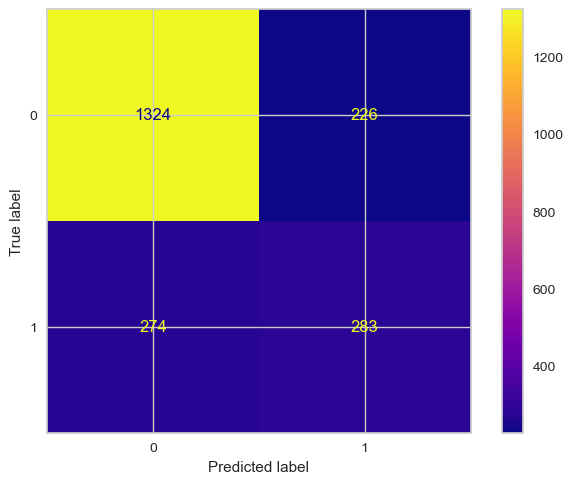

In [183]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_knn.predict(X_test)
y_train_pred = pipe_knn.predict(X_train)
y_pred_proba = pipe_knn.predict_proba(X_test)

eval_metric(pipe_knn, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [184]:
knn_model_f1 = f1_score(y_test, y_pred)
knn_model_acc = accuracy_score(y_test, y_pred)
knn_model_recall = recall_score(y_test, y_pred)
knn_model_auc = roc_auc_score(y_test, y_pred)
knn_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
knn_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.837     0.763
Precision       0.707     0.556
Recall          0.655     0.508
f1              0.680     0.531
roc_auc         0.778     0.681
recall_auc      0.597     0.597

## Cross Validation

In [185]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe_knn_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_knn_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.758
train_accuracy    0.835
test_precision    0.548
train_precision   0.704
test_recall       0.509
train_recall      0.649
test_f1           0.527
train_f1          0.675
dtype: float64

In [186]:
test_error_rates = []


for k in range(1,30):
    
    operations = [("transformer", column_trans), 
                  ("scaler", scaler), 
                  ("knn", KNeighborsClassifier(n_neighbors = k))]

    pipe_knn_elbow = Pipeline(steps = operations)
    
    scores = cross_validate(pipe_knn_elbow , X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

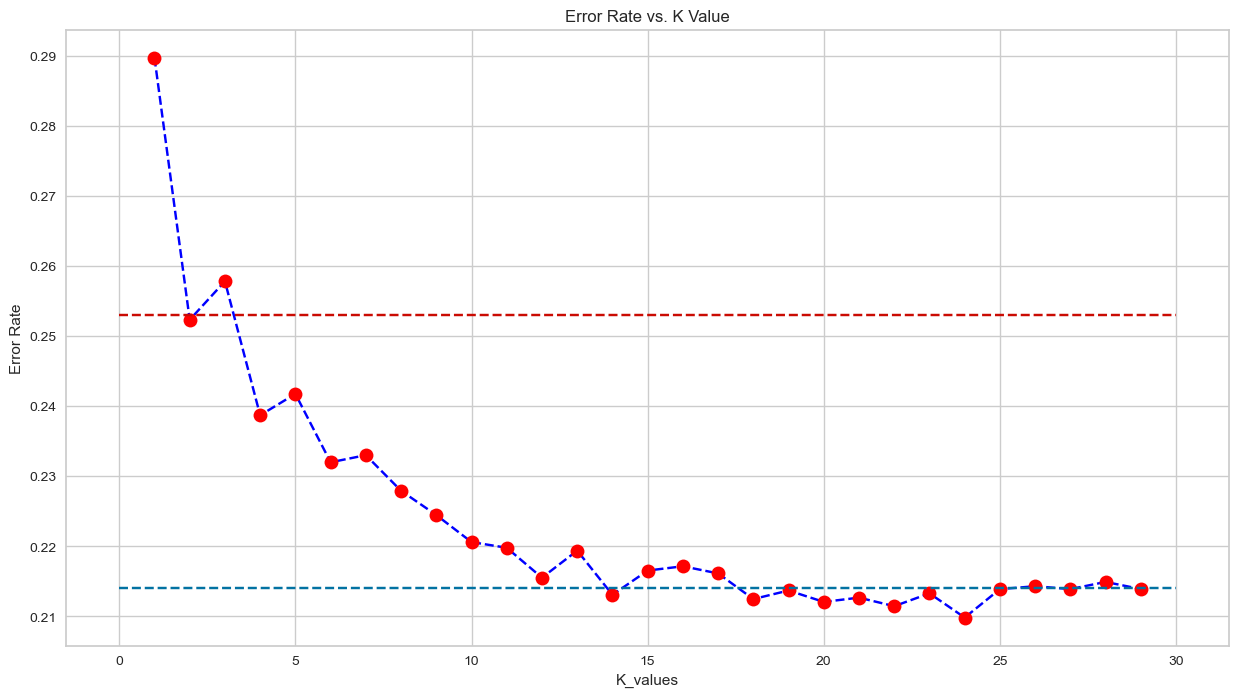

In [187]:
plt.figure(figsize = (15,8))
plt.plot(range(1,30), 
         test_error_rates, 
         color = 'blue', 
         linestyle = '--', 
         marker = 'o',
         markerfacecolor = 'red', 
         markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y = 0.253, xmin = 0, xmax = 30, colors = 'r', linestyles = "--")
plt.hlines(y = 0.214, xmin = 0, xmax = 30, colors = 'b', linestyles = "--")

## GridSearchCV

In [188]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("knn", KNeighborsClassifier())]

# pipeline for logistic regression
pipe_knn_gs = Pipeline(steps = operations)
pipe_knn_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [189]:
# pipe_knn_gs.get_params()

In [190]:
k_values = range(1, 30)

param_grid = {'knn__n_neighbors': k_values,
              'knn__p': [1, 2],
              'knn__weights' :  ['uniform', "distance"],
              }

In [191]:
knn_grid_model = GridSearchCV(pipe_knn_gs, 
                              param_grid, 
                              scoring = "recall", 
                              verbose = 2, 
                              n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', knn_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', knn_grid_model.best_params_)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   20.7s


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

[Parallel(n_jobs=-1)]: Done 580 out of 580 | elapsed:   36.7s finished


In [192]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("knn", KNeighborsClassifier(n_neighbors = 23,
                                           p = 1,
                                           weights = 'uniform'))]

knn_tuned = Pipeline(steps = operations)

knn_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1369  181]
 [ 260  297]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1550
           1       0.62      0.53      0.57       557

    accuracy                           0.79      2107
   macro avg       0.73      0.71      0.72      2107
weighted avg       0.78      0.79      0.79      2107


Train_Set
[[3197  417]
 [ 502  798]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3614
           1       0.66      0.61      0.63      1300

    accuracy                           0.81      4914
   macro avg       0.76      0.75      0.75      4914
weighted avg       0.81      0.81      0.81      4914



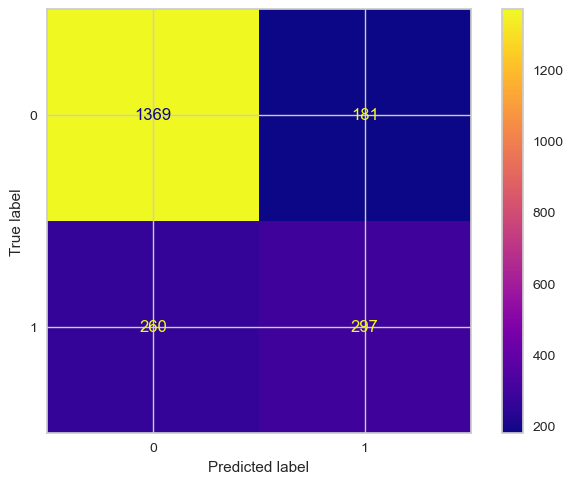

In [193]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = knn_tuned.predict(X_test)
y_train_pred = knn_tuned.predict(X_train)
y_pred_proba = knn_tuned.predict_proba(X_test)

eval_metric(knn_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [194]:
knn_tuned_f1 = f1_score(y_test, y_pred)
knn_tuned_acc = accuracy_score(y_test, y_pred)
knn_tuned_recall = recall_score(y_test, y_pred)
knn_tuned_auc = roc_auc_score(y_test, y_pred)
knn_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
knn_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.813     0.791
Precision       0.657     0.621
Recall          0.614     0.533
f1              0.635     0.574
roc_auc         0.749     0.708
recall_auc      0.639     0.639

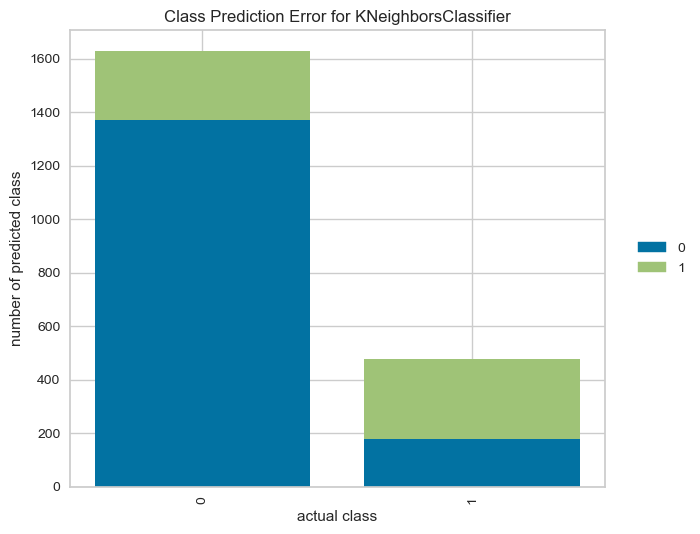

In [195]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(knn_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

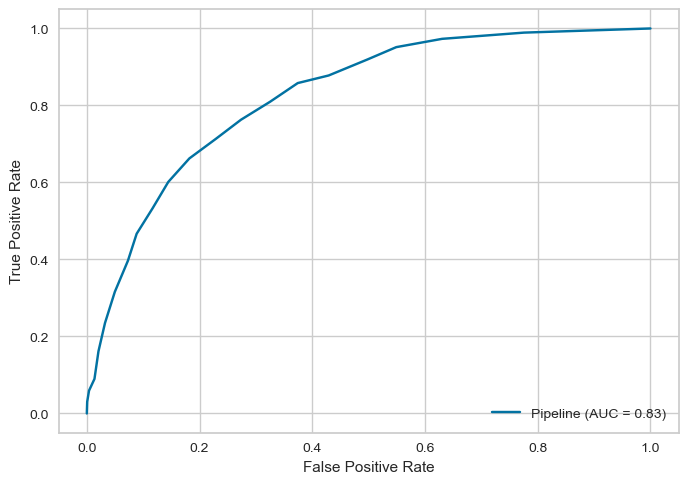

In [196]:
plot_roc_curve(knn_tuned, X_test, y_test);

In [197]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

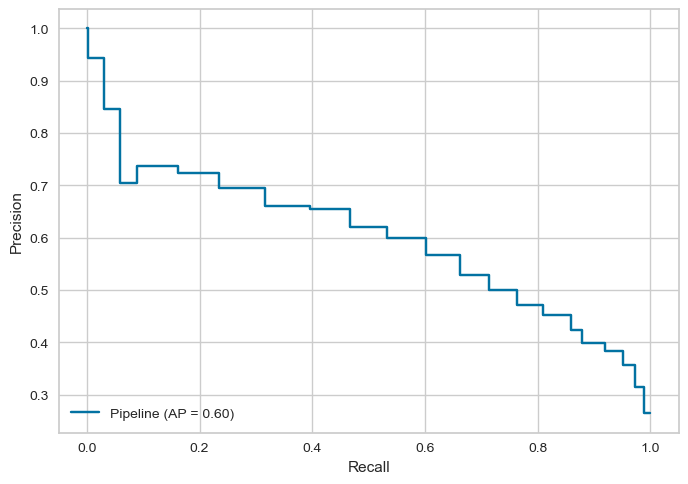

In [198]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(knn_tuned, X_test, y_test);

In [199]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Support Vector Machines

## Model Building with Pipeline

In [200]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.svm import SVC

In [201]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("SVC", SVC(probability = True, random_state = 101))]

pipe_svc = Pipeline(steps = operations)

pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1425  125]
 [ 290  267]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1550
           1       0.68      0.48      0.56       557

    accuracy                           0.80      2107
   macro avg       0.76      0.70      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3324  290]
 [ 585  715]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3614
           1       0.71      0.55      0.62      1300

    accuracy                           0.82      4914
   macro avg       0.78      0.73      0.75      4914
weighted avg       0.81      0.82      0.81      4914



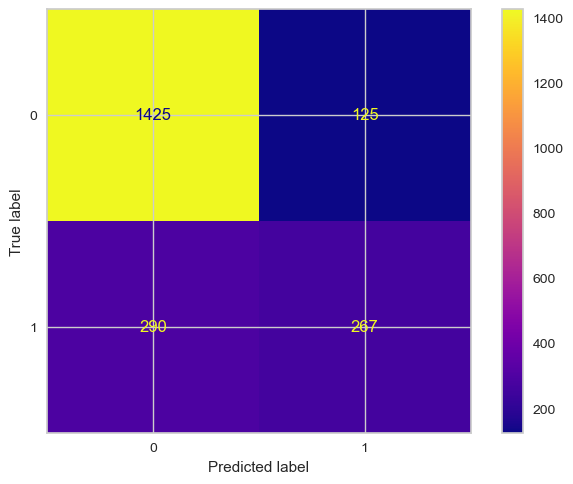

In [202]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_svc.predict(X_test)
y_train_pred = pipe_svc.predict(X_train)
y_pred_proba = pipe_svc.predict_proba(X_test)

eval_metric(pipe_svc, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [203]:
svc_model_f1 = f1_score(y_test, y_pred)
svc_model_acc = accuracy_score(y_test, y_pred)
svc_model_recall = recall_score(y_test, y_pred)
svc_model_auc = roc_auc_score(y_test, y_pred)
svc_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
svc_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.822     0.803
Precision       0.711     0.681
Recall          0.550     0.479
f1              0.620     0.563
roc_auc         0.735     0.699
recall_auc      0.649     0.649

## Cross Validation

In [204]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("SVC", SVC(probability = True, random_state = 101))]

pipe_svc_cv = Pipeline(steps = operations)

scores = cross_validate(pipe_svc_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], 
                        cv = 10, 
                        error_score = "raise", 
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.797
train_accuracy    0.825
test_precision    0.651
train_precision   0.719
test_recall       0.502
train_recall      0.556
test_f1           0.566
train_f1          0.628
dtype: float64

## GridSearchCV

In [205]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("SVC", SVC(probability = True, random_state = 101))]

# pipeline for logistic regression
pipe_svm_gs = Pipeline(steps = operations)
pipe_svm_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [206]:
# pipe_svm_gs.get_params()

In [207]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [208]:
svm_grid_model = GridSearchCV(pipe_svm_gs, 
                              param_grid, 
                              scoring = "recall", 
                              verbose = 2, 
                              n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', svm_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', svm_grid_model.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.6min finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [209]:
operations = [("transformer", column_trans), 
              ("scaler", scaler), 
              ("SVC", SVC(C = 0.05, 
                          class_weight = 'balanced',
                          gamma = 'scale',
                          kernel = 'linear',
                          probability = True,
                          random_state = 101))]

svm_tuned = Pipeline(steps = operations)

svm_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1025  525]
 [  97  460]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1550
           1       0.47      0.83      0.60       557

    accuracy                           0.70      2107
   macro avg       0.69      0.74      0.68      2107
weighted avg       0.80      0.70      0.72      2107


Train_Set
[[2344 1270]
 [ 212 1088]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      3614
           1       0.46      0.84      0.59      1300

    accuracy                           0.70      4914
   macro avg       0.69      0.74      0.68      4914
weighted avg       0.80      0.70      0.72      4914



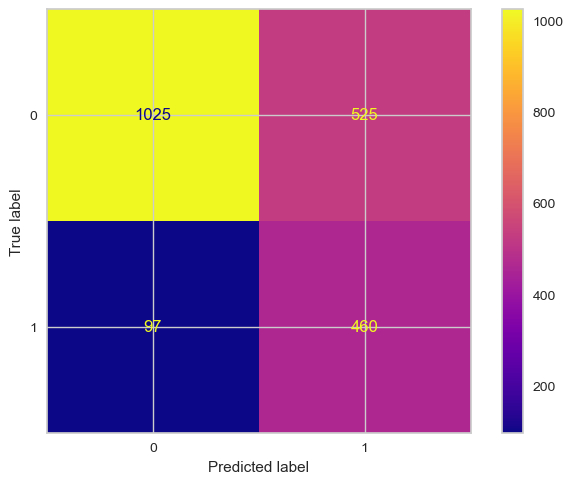

In [210]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = svm_tuned.predict(X_test)
y_train_pred = svm_tuned.predict(X_train)
y_pred_proba = svm_tuned.predict_proba(X_test)

eval_metric(svm_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [211]:
svm_tuned_f1 = f1_score(y_test, y_pred)
svm_tuned_acc = accuracy_score(y_test, y_pred)
svm_tuned_recall = recall_score(y_test, y_pred)
svm_tuned_auc = roc_auc_score(y_test, y_pred)
svm_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
svm_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.698     0.705
Precision       0.461     0.467
Recall          0.837     0.826
f1              0.595     0.597
roc_auc         0.743     0.744
recall_auc      0.669     0.669

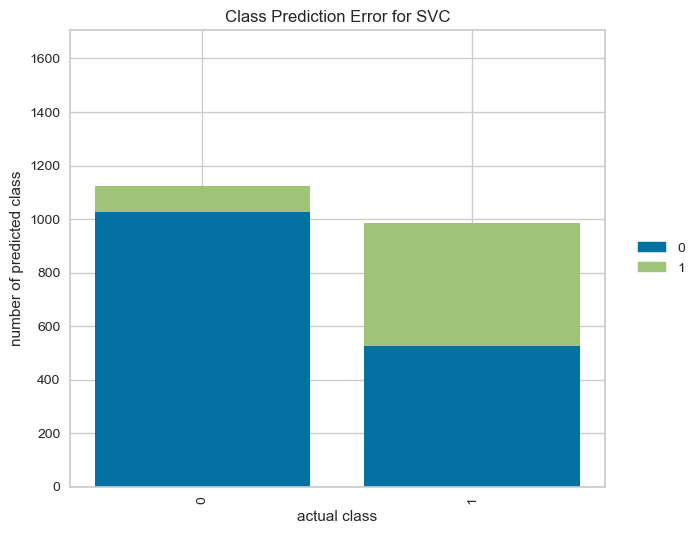

In [212]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(svm_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

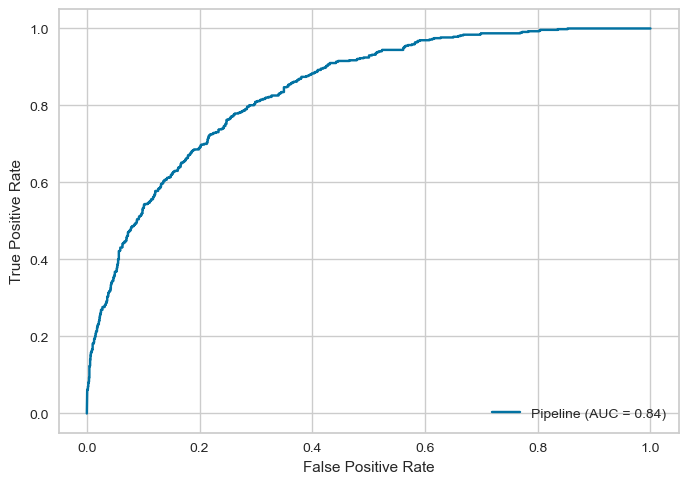

In [213]:
plot_roc_curve(svm_tuned, X_test, y_test);

In [214]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

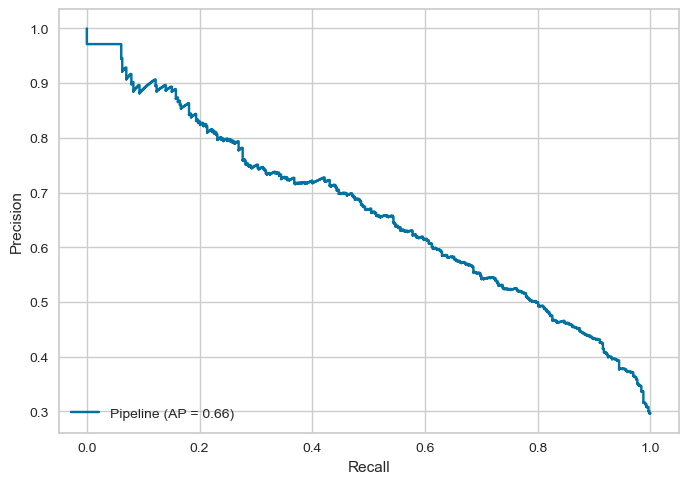

In [215]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(svm_tuned, X_test, y_test);

In [216]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Decision Tree

## Model Building with Pipeline

In [217]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.tree import DecisionTreeClassifier

In [218]:
operations = [("transformer", column_trans), 
              ("DT", DecisionTreeClassifier(random_state = 101))]

pipe_dt = Pipeline(steps = operations)

pipe_dt.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1250  300]
 [ 280  277]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1550
           1       0.48      0.50      0.49       557

    accuracy                           0.72      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.73      0.72      0.73      2107


Train_Set
[[3614    0]
 [   9 1291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      0.99      1.00      1300

    accuracy                           1.00      4914
   macro avg       1.00      1.00      1.00      4914
weighted avg       1.00      1.00      1.00      4914



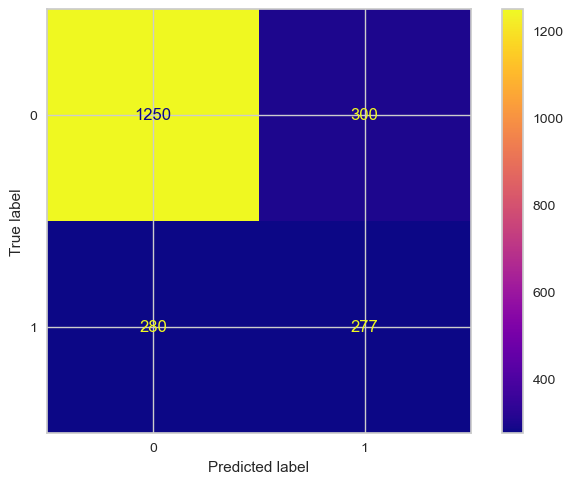

In [219]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_dt.predict(X_test)
y_train_pred = pipe_dt.predict(X_train)
y_pred_proba = pipe_dt.predict_proba(X_test)

eval_metric(pipe_dt, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [220]:
dt_model_f1 = f1_score(y_test, y_pred)
dt_model_acc = accuracy_score(y_test, y_pred)
dt_model_recall = recall_score(y_test, y_pred)
dt_model_auc = roc_auc_score(y_test, y_pred)
dt_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
dt_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.998     0.725
Precision       1.000     0.480
Recall          0.993     0.497
f1              0.997     0.489
roc_auc         0.997     0.652
recall_auc      0.555     0.555

## Cross Validation

In [221]:
operations = [("transformer", column_trans), 
              ("DT", DecisionTreeClassifier(random_state=101))]

pipe_dt_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_dt_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.723
train_accuracy    0.998
test_precision    0.478
train_precision   1.000
test_recall       0.507
train_recall      0.994
test_f1           0.492
train_f1          0.997
dtype: float64

## GridSearchCV

In [222]:
operations = [("transformer", column_trans), 
              ("DT", DecisionTreeClassifier(random_state = 101))]

pipe_dt_gs = Pipeline(steps = operations)
pipe_dt_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [223]:
# pipe_dt_gs.get_params()

In [224]:
param_grid = {"DT__splitter":["best", "random"],
              "DT__max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "DT__max_depth": [None, 2, 3, 4, 5],
              "DT__min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "DT__min_samples_split": [2, 3, 5, 6, 7, 8, 9],
              "DT__class_weight": ["balanced", None]}

In [225]:
dt_grid_model = GridSearchCV(pipe_dt_gs, 
                             param_grid, 
                             scoring = "recall", 
                             verbose = 2, 
                             n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', dt_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', dt_grid_model.best_params_)

Fitting 5 folds for each of 8820 candidates, totalling 44100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 11616 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 13642 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 15828 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 18178 tasks   

****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [226]:
operations = [("transformer", column_trans), 
              ("DT", DecisionTreeClassifier(max_depth = 3,
                                            max_features = 6,
                                            min_samples_leaf = 1,
                                            min_samples_split = 2,
                                            splitter = 'random',
                                            class_weight = 'balanced',
                                            random_state=101))]

dt_tuned = Pipeline(steps = operations)

dt_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[803 747]
 [ 54 503]]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1550
           1       0.40      0.90      0.56       557

    accuracy                           0.62      2107
   macro avg       0.67      0.71      0.61      2107
weighted avg       0.80      0.62      0.64      2107


Train_Set
[[1864 1750]
 [ 111 1189]]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67      3614
           1       0.40      0.91      0.56      1300

    accuracy                           0.62      4914
   macro avg       0.67      0.72      0.61      4914
weighted avg       0.80      0.62      0.64      4914



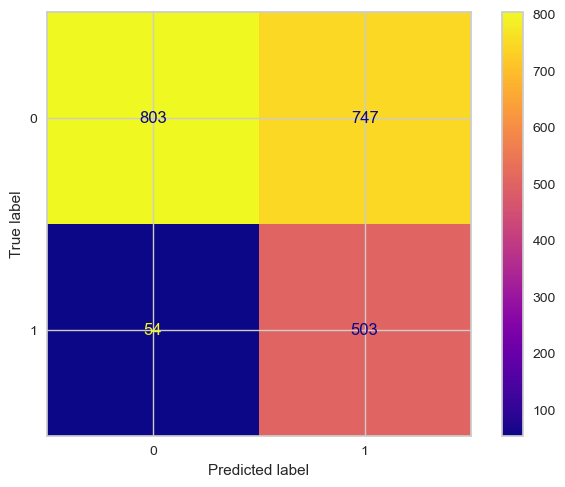

In [227]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = dt_tuned.predict(X_test)
y_train_pred = dt_tuned.predict(X_train)
y_pred_proba = dt_tuned.predict_proba(X_test)

eval_metric(dt_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [228]:
dt_tuned_f1 = f1_score(y_test, y_pred)
dt_tuned_acc = accuracy_score(y_test, y_pred)
dt_tuned_recall = recall_score(y_test, y_pred)
dt_tuned_auc = roc_auc_score(y_test, y_pred)
dt_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
dt_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.621     0.620
Precision       0.405     0.402
Recall          0.915     0.903
f1              0.561     0.557
roc_auc         0.715     0.711
recall_auc      0.666     0.666

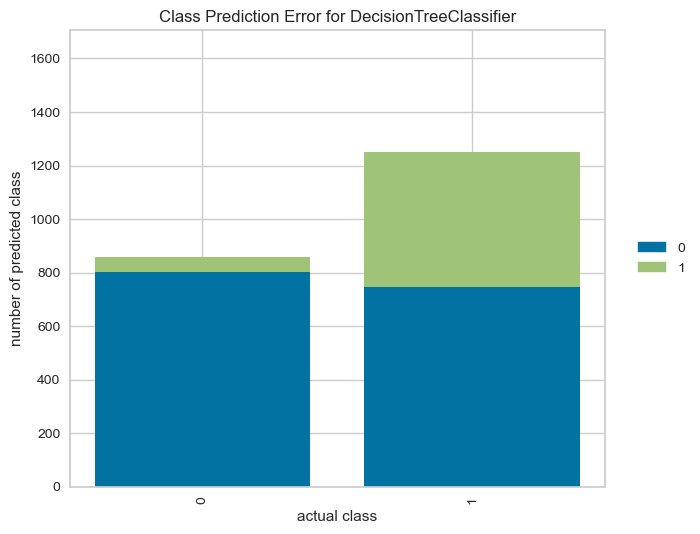

In [229]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(dt_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

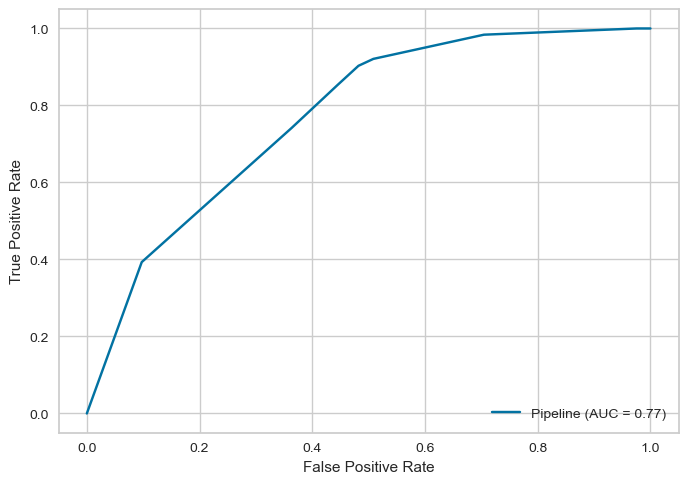

In [230]:
plot_roc_curve(dt_tuned, X_test, y_test);

In [231]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

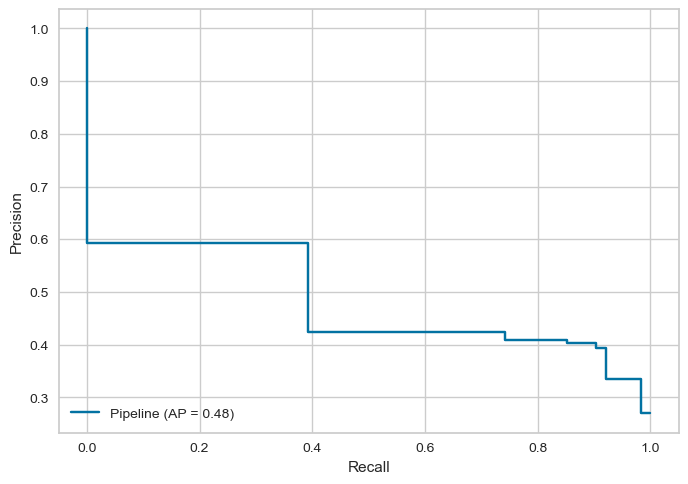

In [232]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(dt_tuned, X_test, y_test);

In [233]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Random Forest

## Model Building with Pipeline

In [234]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.ensemble import RandomForestClassifier

In [235]:
operations = [("transformer", column_trans), 
              ("RF", RandomForestClassifier(random_state = 101))]

pipe_rf = Pipeline(steps = operations)

pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1395  155]
 [ 289  268]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1550
           1       0.63      0.48      0.55       557

    accuracy                           0.79      2107
   macro avg       0.73      0.69      0.70      2107
weighted avg       0.78      0.79      0.78      2107


Train_Set
[[3610    4]
 [   5 1295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      1300

    accuracy                           1.00      4914
   macro avg       1.00      1.00      1.00      4914
weighted avg       1.00      1.00      1.00      4914



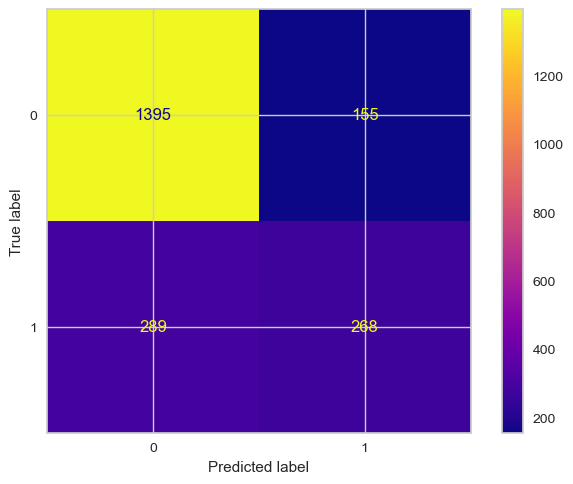

In [236]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_rf.predict(X_test)
y_train_pred = pipe_rf.predict(X_train)
y_pred_proba = pipe_rf.predict_proba(X_test)

eval_metric(pipe_rf, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [237]:
rf_model_f1 = f1_score(y_test, y_pred)
rf_model_acc = accuracy_score(y_test, y_pred)
rf_model_recall = recall_score(y_test, y_pred)
rf_model_auc = roc_auc_score(y_test, y_pred)
rf_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
rf_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.998     0.789
Precision       0.997     0.634
Recall          0.996     0.481
f1              0.997     0.547
roc_auc         0.998     0.691
recall_auc      0.626     0.626

## Cross Validation

In [238]:
operations = [("transformer", column_trans), 
              ("RF", RandomForestClassifier(random_state = 101))]

pipe_rf_cv = Pipeline(steps = operations)

scores = cross_validate(pipe_rf_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.790
train_accuracy    0.998
test_precision    0.634
train_precision   0.997
test_recall       0.490
train_recall      0.997
test_f1           0.552
train_f1          0.997
dtype: float64

## GridSearchCV

In [239]:
operations = [("transformer", column_trans), 
              ("RF", RandomForestClassifier(random_state = 101))]

pipe_rf_gs = Pipeline(steps = operations)
pipe_rf_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [240]:
# pipe_rf_gs.get_params()

In [241]:
param_grid = {'RF__n_estimators': [64, 128, 200],
              'RF__max_features': [2, 4, "auto"],
              'RF__max_depth': [2, 3, 4],
              'RF__min_samples_split': [2, 3,4],
              'RF__min_samples_leaf': [2,3,4],
              'RF__max_samples': [0.8, 1],
              'RF__class_weight': ["balanced", None]}

In [242]:
rf_grid_model = GridSearchCV(pipe_rf_gs, 
                             param_grid, 
                             scoring = "recall", 
                             verbose = 2, 
                             n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', rf_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', rf_grid_model.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed:  8.3min finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [243]:
operations = [("transformer", column_trans), 
              ("RF", RandomForestClassifier(class_weight = 'balanced',
                                            max_depth = 3,
                                            max_features = 4,
                                            max_samples = 0.8,
                                            min_samples_leaf = 2,
                                            min_samples_split = 2,
                                            n_estimators = 128,                                            
                                            random_state = 101))]

rf_tuned = Pipeline(steps = operations)

rf_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1138  412]
 [ 131  426]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1550
           1       0.51      0.76      0.61       557

    accuracy                           0.74      2107
   macro avg       0.70      0.75      0.71      2107
weighted avg       0.79      0.74      0.76      2107


Train_Set
[[2666  948]
 [ 244 1056]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3614
           1       0.53      0.81      0.64      1300

    accuracy                           0.76      4914
   macro avg       0.72      0.77      0.73      4914
weighted avg       0.81      0.76      0.77      4914



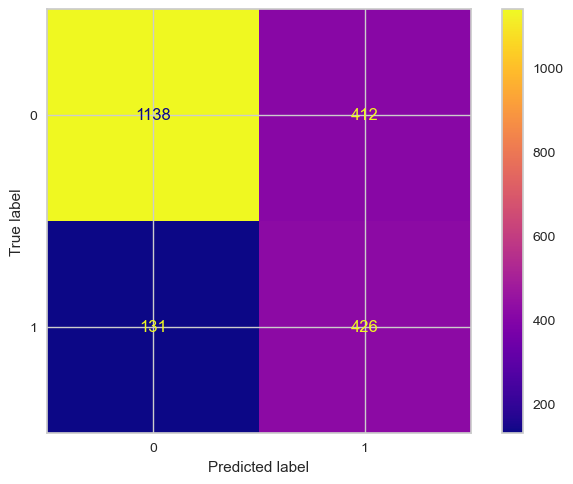

In [244]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = rf_tuned.predict(X_test)
y_train_pred = rf_tuned.predict(X_train)
y_pred_proba = rf_tuned.predict_proba(X_test)

eval_metric(rf_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [245]:
rf_tuned_f1 = f1_score(y_test, y_pred)
rf_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
rf_tuned_auc = roc_auc_score(y_test, y_pred)
rf_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
rf_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.757     0.742
Precision       0.527     0.508
Recall          0.812     0.765
f1              0.639     0.611
roc_auc         0.775     0.750
recall_auc      0.668     0.668

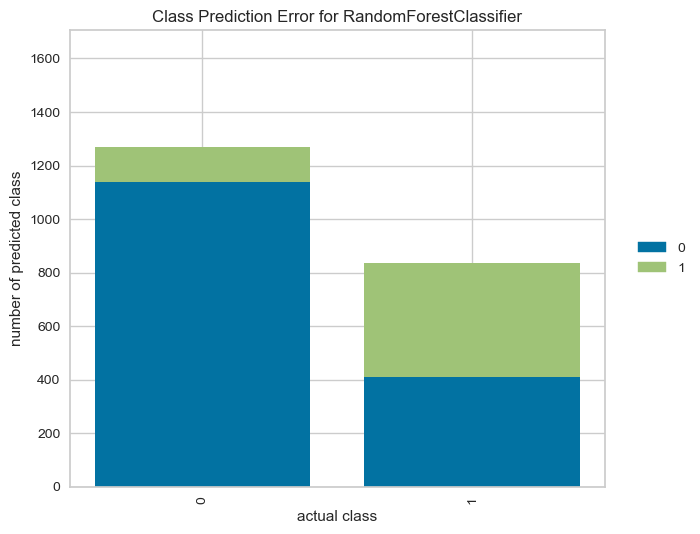

In [246]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rf_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

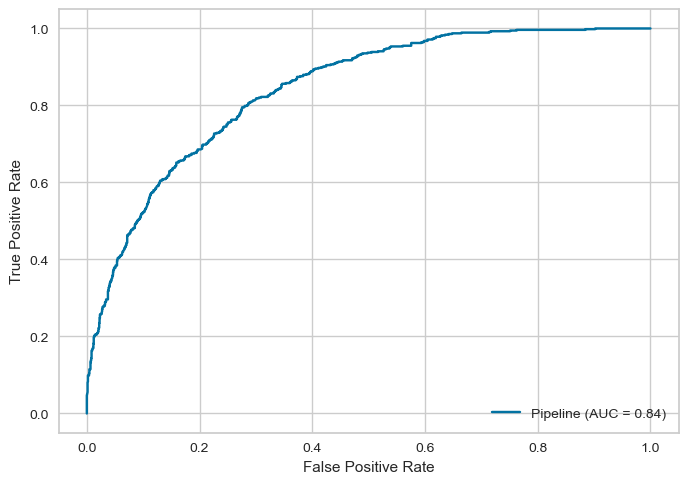

In [247]:
plot_roc_curve(rf_tuned, X_test, y_test);

In [248]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

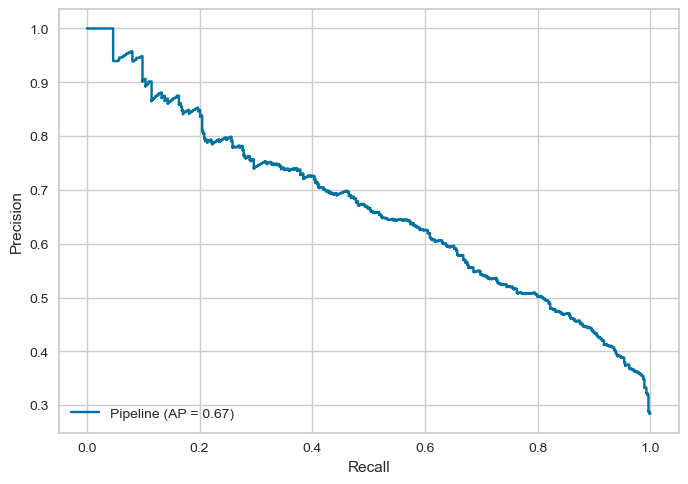

In [249]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(rf_tuned, X_test, y_test);

In [250]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Adaboosting

## Model Building with Pipeline

In [252]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.ensemble import AdaBoostClassifier

In [253]:
operations = [("transformer", column_trans), 
              ("Ada", AdaBoostClassifier(random_state = 101))]

pipe_ada = Pipeline(steps = operations)

pipe_ada.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1408  142]
 [ 275  282]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.67      0.51      0.57       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3279  335]
 [ 572  728]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3614
           1       0.68      0.56      0.62      1300

    accuracy                           0.82      4914
   macro avg       0.77      0.73      0.75      4914
weighted avg       0.81      0.82      0.81      4914



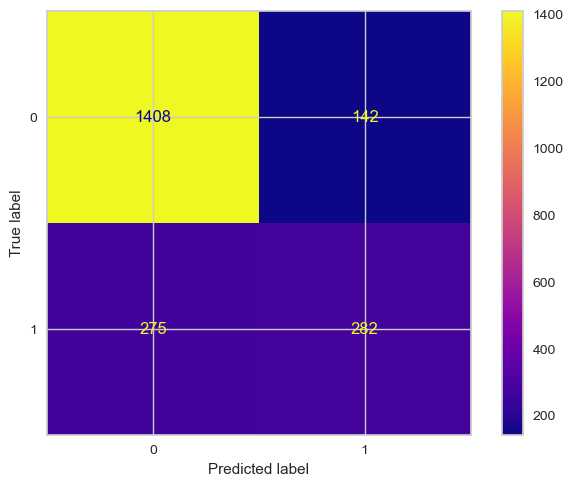

In [254]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_ada.predict(X_test)
y_train_pred = pipe_ada.predict(X_train)
y_pred_proba = pipe_ada.predict_proba(X_test)

eval_metric(pipe_ada, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [255]:
ada_model_f1 = f1_score(y_test, y_pred)
ada_model_acc = accuracy_score(y_test, y_pred)
ada_model_recall = recall_score(y_test, y_pred)
ada_model_auc = roc_auc_score(y_test, y_pred)
ada_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
ada_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.815     0.802
Precision       0.685     0.665
Recall          0.560     0.506
f1              0.616     0.575
roc_auc         0.734     0.707
recall_auc      0.651     0.651

## Cross Validation

In [256]:
operations = [("transformer", column_trans), 
              ("ada", RandomForestClassifier(random_state = 101))]

pipe_ada_cv = Pipeline(steps = operations)

scores = cross_validate(pipe_ada_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.790
train_accuracy    0.998
test_precision    0.634
train_precision   0.997
test_recall       0.490
train_recall      0.997
test_f1           0.552
train_f1          0.997
dtype: float64

## GridSearchCV

In [257]:
operations = [("transformer", column_trans), 
              ("Ada", AdaBoostClassifier(random_state = 101))]

pipe_ada_gs = Pipeline(steps = operations)
pipe_ada_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [258]:
# pipe_ada_gs.get_params()

In [259]:
param_grid = {"Ada__n_estimators": [20, 30, 100, 200], 
              "Ada__learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [260]:
ada_grid_model = GridSearchCV(pipe_ada_gs, 
                              param_grid, 
                              scoring = "recall", 
                              verbose = 2, 
                              n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', ada_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', ada_grid_model.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.0s finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [261]:
operations = [("transformer", column_trans), 
              ("Ada", AdaBoostClassifier(random_state = 101,
                                         learning_rate = 1.0,
                                         n_estimators = 200))]

ada_tuned = Pipeline(steps = operations)

ada_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1409  141]
 [ 270  287]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.67      0.52      0.58       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.73      2107
weighted avg       0.79      0.80      0.80      2107


Train_Set
[[3273  341]
 [ 556  744]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3614
           1       0.69      0.57      0.62      1300

    accuracy                           0.82      4914
   macro avg       0.77      0.74      0.75      4914
weighted avg       0.81      0.82      0.81      4914



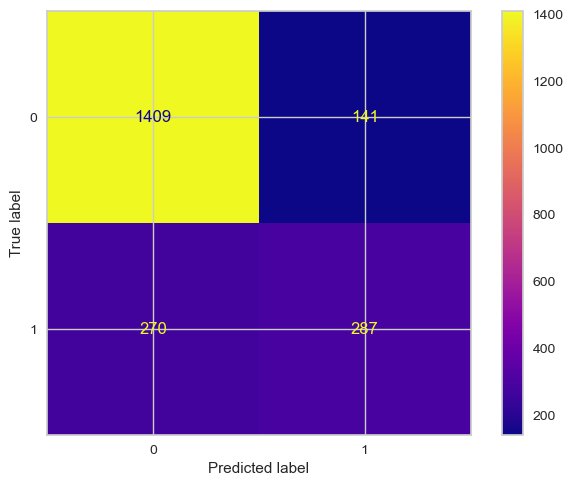

In [262]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = ada_tuned.predict(X_test)
y_train_pred = ada_tuned.predict(X_train)
y_pred_proba = ada_tuned.predict_proba(X_test)

eval_metric(ada_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [263]:
ada_tuned_f1 = f1_score(y_test, y_pred)
ada_tuned_acc = accuracy_score(y_test, y_pred)
ada_tuned_recall = recall_score(y_test, y_pred)
ada_tuned_auc = roc_auc_score(y_test, y_pred)
ada_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
ada_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.817     0.805
Precision       0.686     0.671
Recall          0.572     0.515
f1              0.624     0.583
roc_auc         0.739     0.712
recall_auc      0.657     0.657

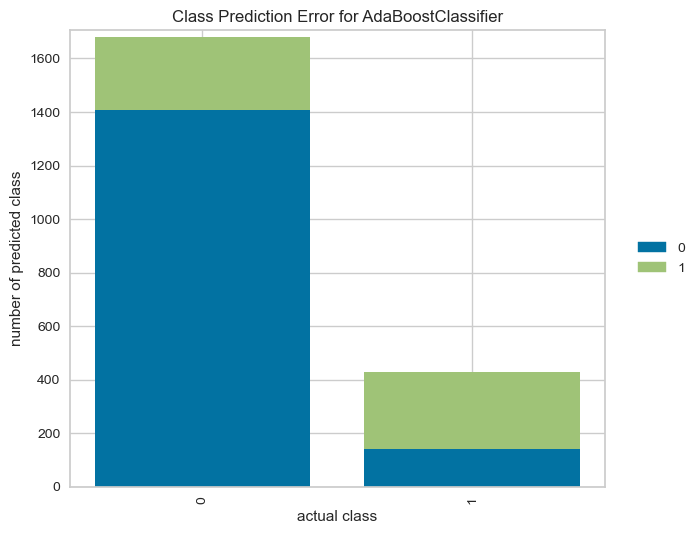

In [264]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(ada_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

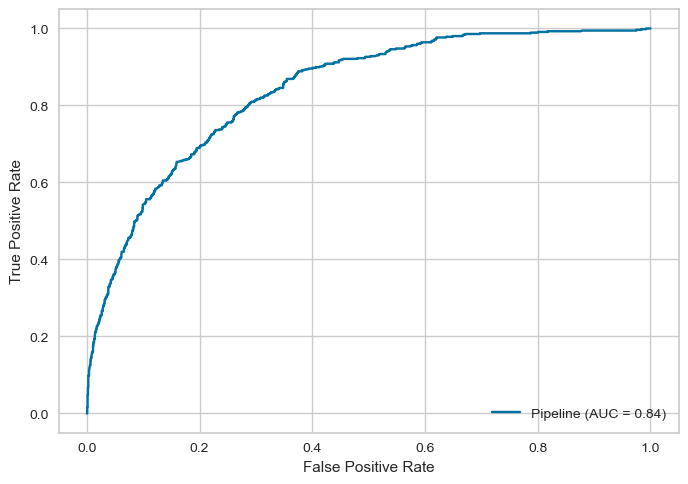

In [265]:
plot_roc_curve(ada_tuned, X_test, y_test);

In [266]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

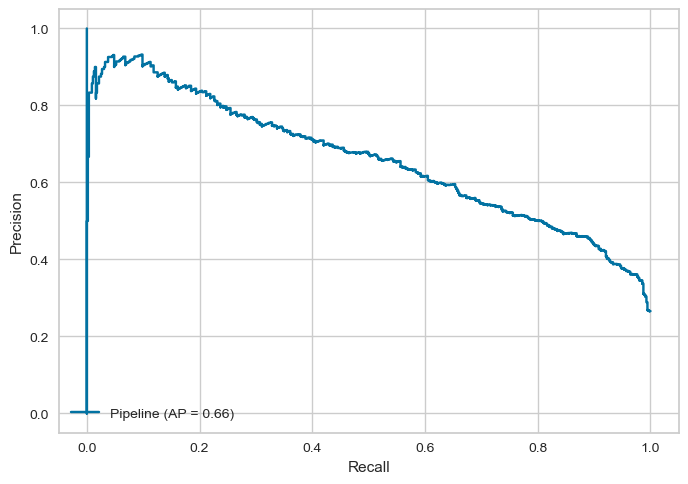

In [267]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(ada_tuned, X_test, y_test);

In [268]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Gradient Boosting

## Model Building with Pipeline

In [269]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.ensemble import GradientBoostingClassifier

In [270]:
operations = [("transformer", column_trans), 
              ("GB", GradientBoostingClassifier(random_state = 101))]

pipe_gb = Pipeline(steps = operations)

pipe_gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1410  140]
 [ 273  284]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.67      0.51      0.58       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.73      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3312  302]
 [ 524  776]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3614
           1       0.72      0.60      0.65      1300

    accuracy                           0.83      4914
   macro avg       0.79      0.76      0.77      4914
weighted avg       0.83      0.83      0.83      4914



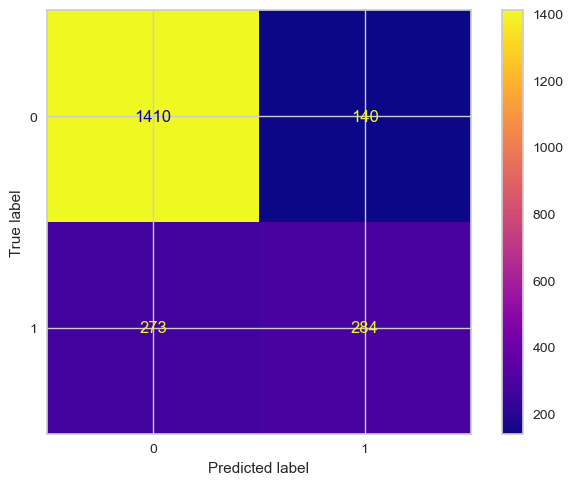

In [271]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_gb.predict(X_test)
y_train_pred = pipe_gb.predict(X_train)
y_pred_proba = pipe_gb.predict_proba(X_test)

eval_metric(pipe_gb, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [272]:
gb_model_f1 = f1_score(y_test, y_pred)
gb_model_acc = accuracy_score(y_test, y_pred)
gb_model_recall = recall_score(y_test, y_pred)
gb_model_auc = roc_auc_score(y_test, y_pred)
gb_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
gb_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.832     0.804
Precision       0.720     0.670
Recall          0.597     0.510
f1              0.653     0.579
roc_auc         0.757     0.710
recall_auc      0.655     0.655

## Cross Validation

In [273]:
operations = [("transformer", column_trans), 
              ("GB", GradientBoostingClassifier(random_state = 101))]

pipe_gb_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_gb_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.804
train_accuracy    0.834
test_precision    0.662
train_precision   0.726
test_recall       0.531
train_recall      0.596
test_f1           0.589
train_f1          0.654
dtype: float64

## GridSearchCV

In [274]:
operations = [("transformer", column_trans), 
              ("GB", GradientBoostingClassifier(random_state = 101))]


pipe_gb_gs = Pipeline(steps=operations)
pipe_gb_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [275]:
# pipe_gb_gs.get_params()

In [276]:
param_grid = {"GB__n_estimators":[100, 200, 300], 
              "GB__subsample":[0.5, 1], 
              "GB__max_features" : [None, 2, 3, 4], 
              "GB__learning_rate": [0.001, 0.01, 0.1], 
              "GB__max_depth":[3,4,5,6]} #0.8

In [277]:
gb_grid_model = GridSearchCV(pipe_gb_gs, 
                             param_grid, 
                             scoring = "recall", 
                             verbose = 2, 
                             n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', gb_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', gb_grid_model.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.9min finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [278]:
operations = [("transformer", column_trans), 
              ("GB", GradientBoostingClassifier(max_depth = 4,
                                                max_features = 3,
                                                subsample = 1,
                                                n_estimators = 100,
                                                learning_rate = 0.1,
                                                random_state = 101))]

gb_tuned = Pipeline(steps = operations)

gb_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1403  147]
 [ 273  284]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.66      0.51      0.57       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3302  312]
 [ 508  792]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3614
           1       0.72      0.61      0.66      1300

    accuracy                           0.83      4914
   macro avg       0.79      0.76      0.77      4914
weighted avg       0.83      0.83      0.83      4914



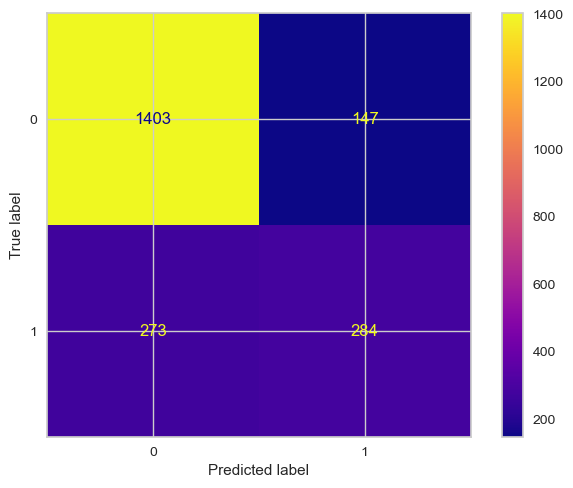

In [279]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = gb_tuned.predict(X_test)
y_train_pred = gb_tuned.predict(X_train)
y_pred_proba = gb_tuned.predict_proba(X_test)

eval_metric(gb_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [280]:
gb_tuned_f1 = f1_score(y_test, y_pred)
gb_tuned_acc = accuracy_score(y_test, y_pred)
gb_tuned_recall = recall_score(y_test, y_pred)
gb_tuned_auc = roc_auc_score(y_test, y_pred)
gb_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
gb_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.833     0.801
Precision       0.717     0.659
Recall          0.609     0.510
f1              0.659     0.575
roc_auc         0.761     0.708
recall_auc      0.649     0.649

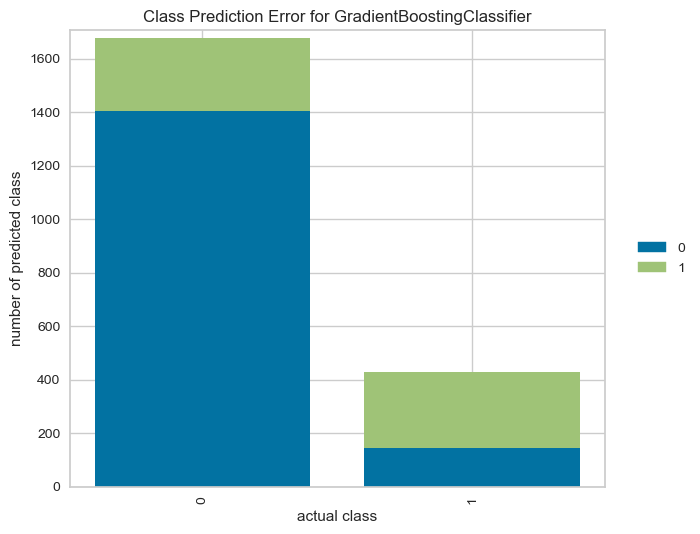

In [281]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(gb_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

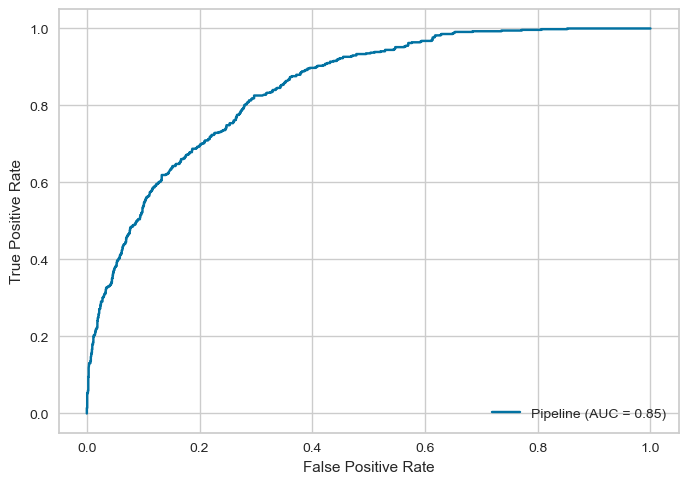

In [282]:
plot_roc_curve(gb_tuned, X_test, y_test);

In [283]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

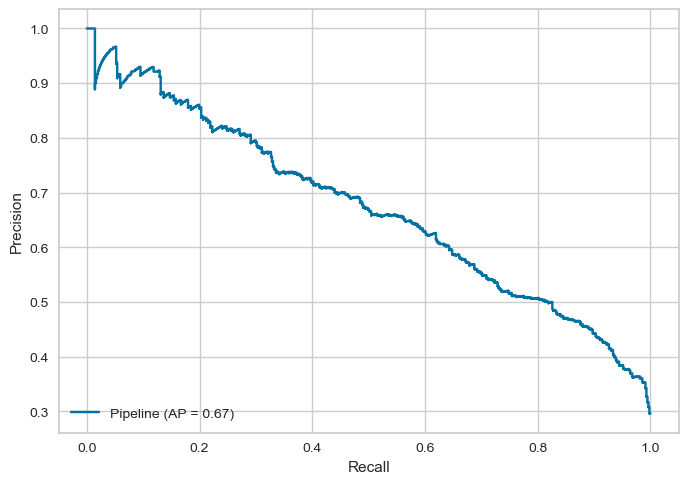

In [284]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(gb_tuned, X_test, y_test);

In [285]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# XG Boosting

## Model Building with Pipeline

In [286]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from xgboost import XGBClassifier

In [287]:
import xgboost as xgb

xgb.__version__

'0.90'

In [288]:
operations = [("transformer", column_trans), 
              ("XGB", XGBClassifier(random_state=101))]

pipe_xgb = Pipeline(steps = operations)

pipe_xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1411  139]
 [ 276  281]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.67      0.50      0.58       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3303  311]
 [ 557  743]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3614
           1       0.70      0.57      0.63      1300

    accuracy                           0.82      4914
   macro avg       0.78      0.74      0.76      4914
weighted avg       0.82      0.82      0.82      4914



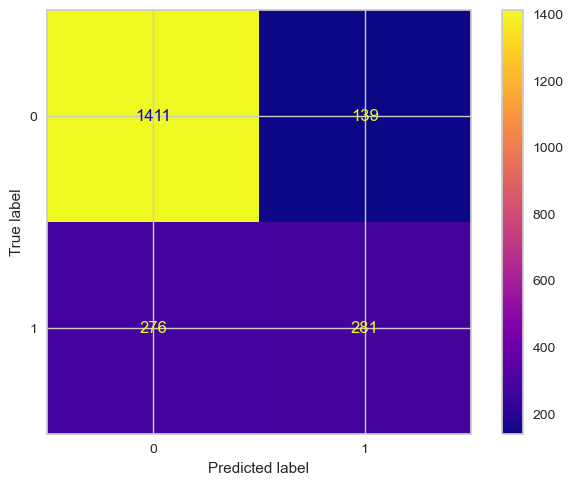

In [289]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_xgb.predict(X_test)
y_train_pred = pipe_xgb.predict(X_train)
y_pred_proba = pipe_xgb.predict_proba(X_test)

eval_metric(pipe_xgb, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [290]:
xgb_model_f1 = f1_score(y_test, y_pred)
xgb_model_acc = accuracy_score(y_test, y_pred)
xgb_model_recall = recall_score(y_test, y_pred)
xgb_model_auc = roc_auc_score(y_test, y_pred)
xgb_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
xgb_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.823     0.803
Precision       0.705     0.669
Recall          0.572     0.504
f1              0.631     0.575
roc_auc         0.743     0.707
recall_auc      0.652     0.652

## Cross Validation

In [291]:
operations = [("transformer", column_trans), 
              ("XGB", XGBClassifier(random_state = 101))]

pipe_xgb_cv = Pipeline(steps = operations)

scores = cross_validate(pipe_xgb_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True,
                        verbose = 0)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.801
train_accuracy    0.826
test_precision    0.655
train_precision   0.710
test_recall       0.526
train_recall      0.579
test_f1           0.583
train_f1          0.638
dtype: float64

## GridSearchCV

In [292]:
operations = [("transformer", column_trans), 
              ("XGB", XGBClassifier(random_state = 101))]

pipe_xgb_gs = Pipeline(steps = operations)
pipe_xgb_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [293]:
# pipe_xgb_gs.get_params()

In [294]:
param_grid = {"XGB__n_estimators":[50, 100, 200],
              'XGB__max_depth':[3,4,5], 
              "XGB__learning_rate": [0.1, 0.2],
              "XGB__subsample":[0.5, 0.8, 1], 
              "XGB__colsample_bytree":[0.5, 0.7, 1],
              "XGB__scale_pos_weight":[None, 3, 5, 7]}

In [295]:
xgb_grid_model = GridSearchCV(pipe_xgb_gs, 
                              param_grid, 
                              scoring = "recall",
                              verbose = 2,
                              n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', xgb_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', xgb_grid_model.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  8.4min finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [296]:
operations = [("transformer", column_trans), 
              ("XGB", XGBClassifier(random_state = 101,
                                    n_estimators = 50,
                                    max_depth = 3,
                                    learning_rate = 0.1,
                                    subsample = 0.8,
                                    colsample_bytree = 0.7, 
                                    scale_pos_weight = 7))]

xgb_tuned = Pipeline(steps = operations)

xgb_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[864 686]
 [ 48 509]]
              precision    recall  f1-score   support

           0       0.95      0.56      0.70      1550
           1       0.43      0.91      0.58       557

    accuracy                           0.65      2107
   macro avg       0.69      0.74      0.64      2107
weighted avg       0.81      0.65      0.67      2107


Train_Set
[[1998 1616]
 [  65 1235]]
              precision    recall  f1-score   support

           0       0.97      0.55      0.70      3614
           1       0.43      0.95      0.60      1300

    accuracy                           0.66      4914
   macro avg       0.70      0.75      0.65      4914
weighted avg       0.83      0.66      0.68      4914



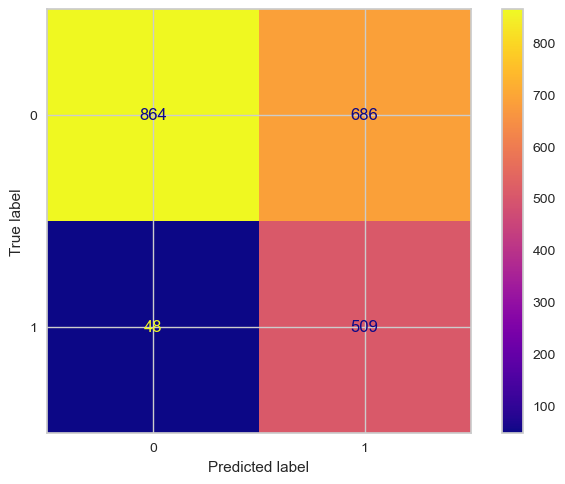

In [297]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = xgb_tuned.predict(X_test)
y_train_pred = xgb_tuned.predict(X_train)
y_pred_proba = xgb_tuned.predict_proba(X_test)

eval_metric(xgb_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [298]:
xgb_tuned_f1 = f1_score(y_test, y_pred)
xgb_tuned_acc = accuracy_score(y_test, y_pred)
xgb_tuned_recall = recall_score(y_test, y_pred)
xgb_tuned_auc = roc_auc_score(y_test, y_pred)
xgb_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
xgb_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.658     0.652
Precision       0.433     0.426
Recall          0.950     0.914
f1              0.595     0.581
roc_auc         0.751     0.736
recall_auc      0.681     0.681

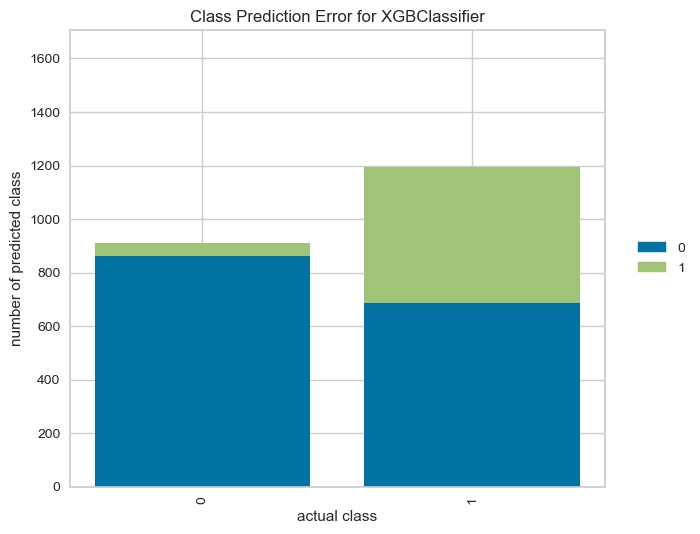

In [299]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(xgb_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

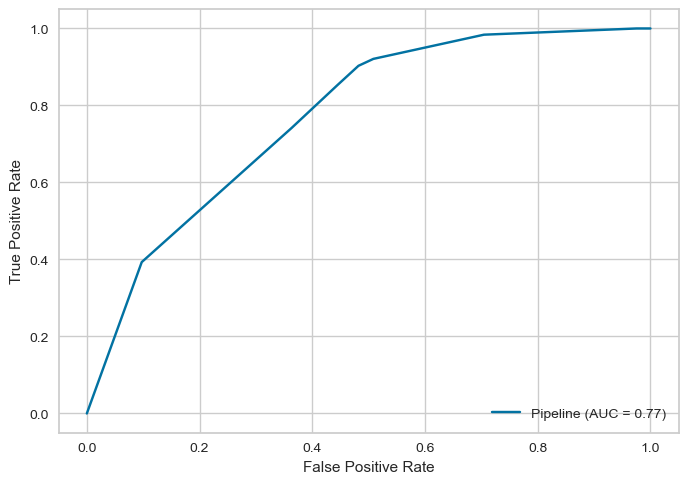

In [300]:
plot_roc_curve(dt_tuned, X_test, y_test);

In [301]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

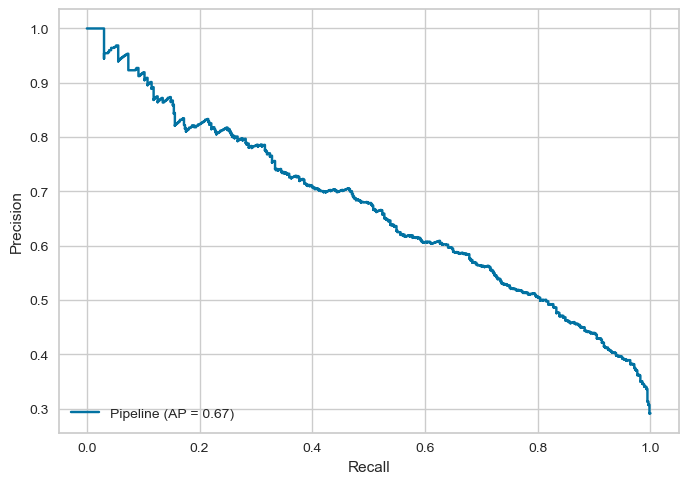

In [302]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(xgb_tuned, X_test, y_test);

In [303]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# LightGBM

## Model Building with Pipeline

In [304]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from lightgbm import LGBMClassifier

In [305]:
operations = [("transformer", column_trans), 
              ("LGBM", LGBMClassifier(random_state = 101))]

pipe_lgbm = Pipeline(steps = operations)

pipe_lgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1396  154]
 [ 265  292]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1550
           1       0.65      0.52      0.58       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.73      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3400  214]
 [ 339  961]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3614
           1       0.82      0.74      0.78      1300

    accuracy                           0.89      4914
   macro avg       0.86      0.84      0.85      4914
weighted avg       0.89      0.89      0.89      4914



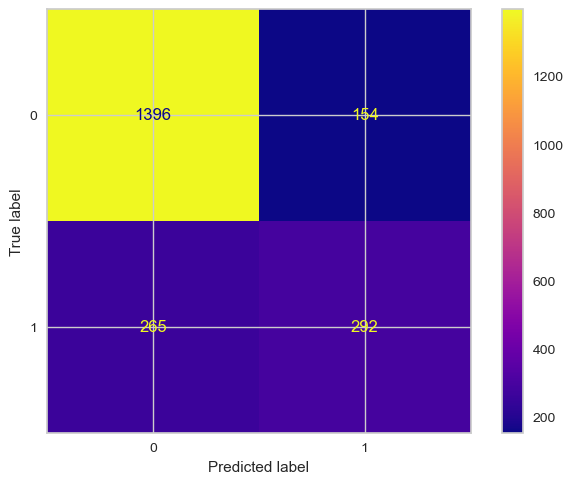

In [306]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_lgbm.predict(X_test)
y_train_pred = pipe_lgbm.predict(X_train)
y_pred_proba = pipe_lgbm.predict_proba(X_test)

eval_metric(pipe_lgbm, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [307]:
lgbm_model_f1 = f1_score(y_test, y_pred)
lgbm_model_acc = accuracy_score(y_test, y_pred)
lgbm_model_recall = recall_score(y_test, y_pred)
lgbm_model_auc = roc_auc_score(y_test, y_pred)
lgbm_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
lgbm_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.887     0.801
Precision       0.818     0.655
Recall          0.739     0.524
f1              0.777     0.582
roc_auc         0.840     0.712
recall_auc      0.652     0.652

## Cross Validation

In [308]:
operations = [("transformer", column_trans), 
              ("LGBM", LGBMClassifier(random_state = 101))]

pipe_lgbm_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_lgbm_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.789
train_accuracy    0.898
test_precision    0.617
train_precision   0.839
test_recall       0.534
train_recall      0.762
test_f1           0.572
train_f1          0.798
dtype: float64

## GridSearchCV

In [309]:
operations = [("transformer", column_trans), 
              ("LGBM", LGBMClassifier(random_state = 101))]

pipe_lgbm_gs = Pipeline(steps = operations)
pipe_lgbm_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [310]:
# pipe_lgbm_gs.get_params()

In [311]:
param_grid = {"LGBM__n_estimators":[50, 100, 200],
              'LGBM__max_depth':[3,4,5], 
              "LGBM__learning_rate": [0.1, 0.2],
              "LGBM__subsample":[0.5, 0.8, 1], 
              "LGBM__colsample_bytree":[0.5, 0.7, 1],
              "LGBM__class_weight":[None, "balanced"]}

In [312]:
lgbm_grid_model = GridSearchCV(pipe_lgbm_gs, 
                               param_grid, 
                               scoring = "recall", 
                               verbose = 2, 
                               n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', lgbm_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', lgbm_grid_model.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.1min


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.2min finished


In [313]:
operations = [("transformer", column_trans), 
              ("LGBM", LGBMClassifier(class_weight = 'balanced',
                                      colsample_bytree = 1,
                                      learning_rate = 0.1,
                                      max_depth = 3,
                                      n_estimators = 50,
                                      subsample = 0.5,                                            
                                      random_state=101))]

lgbm_tuned = Pipeline(steps = operations)

lgbm_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[1137  413]
 [ 123  434]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1550
           1       0.51      0.78      0.62       557

    accuracy                           0.75      2107
   macro avg       0.71      0.76      0.71      2107
weighted avg       0.80      0.75      0.76      2107


Train_Set
[[2649  965]
 [ 213 1087]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      3614
           1       0.53      0.84      0.65      1300

    accuracy                           0.76      4914
   macro avg       0.73      0.78      0.73      4914
weighted avg       0.82      0.76      0.77      4914



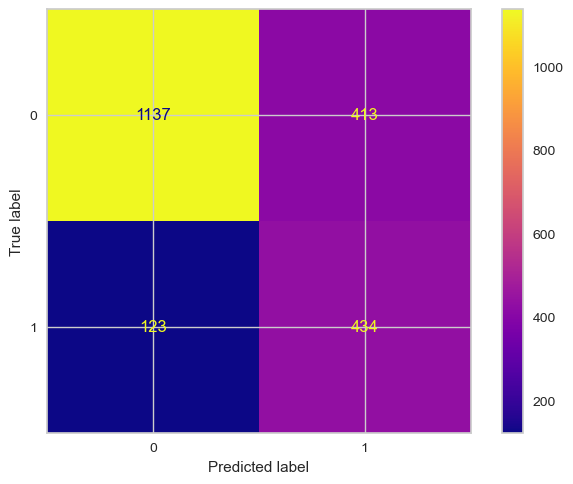

In [314]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = lgbm_tuned.predict(X_test)
y_train_pred = lgbm_tuned.predict(X_train)
y_pred_proba = lgbm_tuned.predict_proba(X_test)

eval_metric(lgbm_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [315]:
lgbm_tuned_f1 = f1_score(y_test, y_pred)
lgbm_tuned_acc = accuracy_score(y_test, y_pred)
lgbm_tuned_recall = recall_score(y_test, y_pred)
lgbm_tuned_auc = roc_auc_score(y_test, y_pred)
lgbm_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
lgbm_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.760     0.746
Precision       0.530     0.512
Recall          0.836     0.779
f1              0.649     0.618
roc_auc         0.785     0.756
recall_auc      0.675     0.675

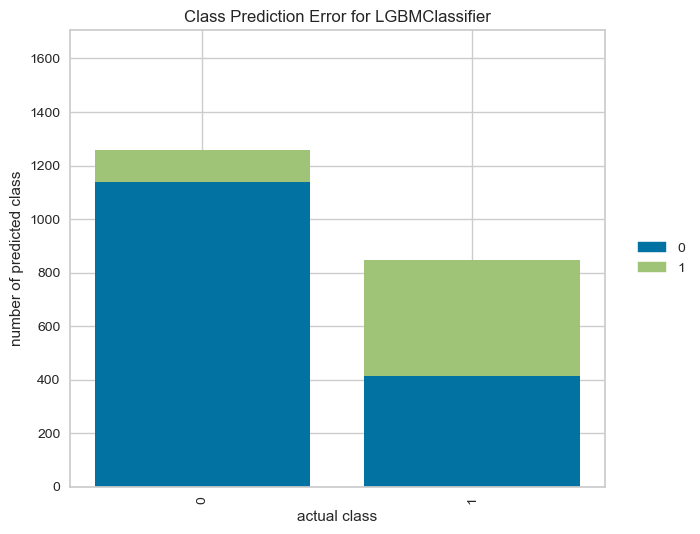

In [316]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(lgbm_tuned)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

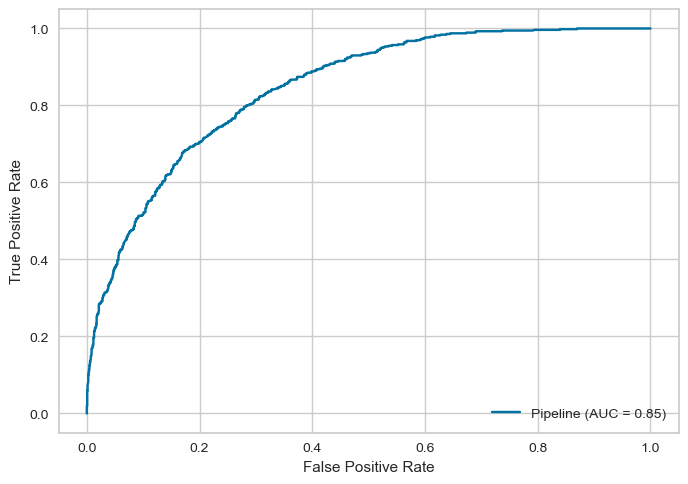

In [317]:
plot_roc_curve(lgbm_tuned, X_test, y_test);

In [318]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

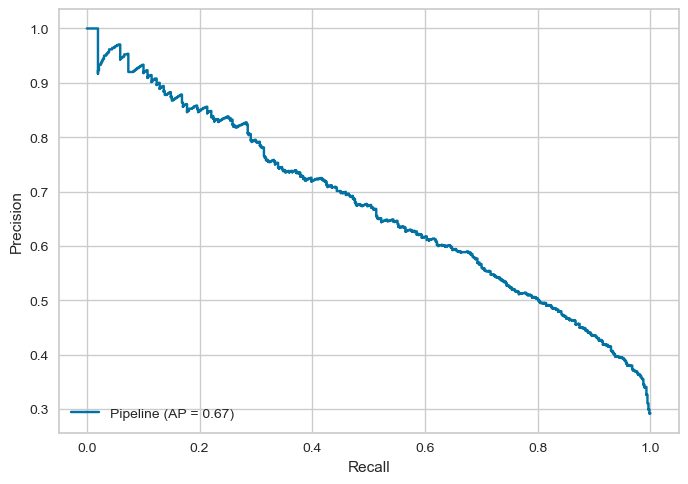

In [319]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(lgbm_tuned, X_test, y_test);

In [320]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Catboost

## Model Building with Pipeline

In [321]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from catboost import CatBoostClassifier

In [322]:
operations = [("transformer", column_trans), 
              ("CB", CatBoostClassifier(random_state = 101,
                                        silent = True))]

pipe_cb = Pipeline(steps = operations)

pipe_cb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

## Model Performance

Test_Set
[[1404  146]
 [ 275  282]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.66      0.51      0.57       557

    accuracy                           0.80      2107
   macro avg       0.75      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107


Train_Set
[[3400  214]
 [ 393  907]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3614
           1       0.81      0.70      0.75      1300

    accuracy                           0.88      4914
   macro avg       0.85      0.82      0.83      4914
weighted avg       0.87      0.88      0.87      4914



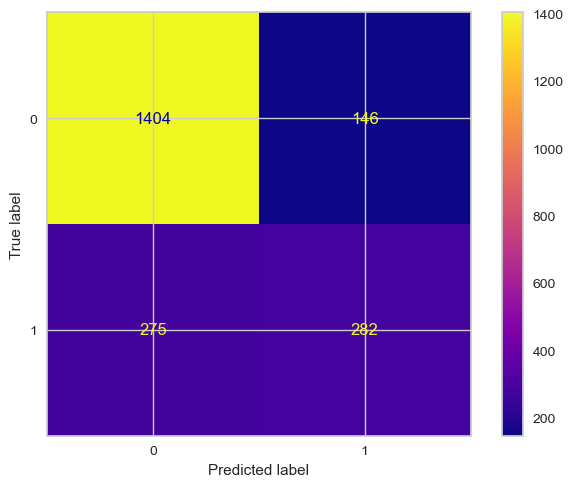

In [323]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = pipe_cb.predict(X_test)
y_train_pred = pipe_cb.predict(X_train)
y_pred_proba = pipe_cb.predict_proba(X_test)

eval_metric(pipe_cb, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [324]:
cb_model_f1 = f1_score(y_test, y_pred)
cb_model_acc = accuracy_score(y_test, y_pred)
cb_model_recall = recall_score(y_test, y_pred)
cb_model_auc = roc_auc_score(y_test, y_pred)
cb_model_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
cb_model_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.876     0.800
Precision       0.809     0.659
Recall          0.698     0.506
f1              0.749     0.573
roc_auc         0.819     0.706
recall_auc      0.648     0.648

## Cross Validation

In [325]:
operations = [("transformer", column_trans), 
              ("CB", CatBoostClassifier(random_state = 101,
                                        silent = True))]

pipe_cb_cv = Pipeline(steps=operations)

scores = cross_validate(pipe_cb_cv, 
                        X_train, y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10,
                        error_score = "raise",
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_accuracy     0.796
train_accuracy    0.879
test_precision    0.643
train_precision   0.816
test_recall       0.524
train_recall      0.703
test_f1           0.577
train_f1          0.755
dtype: float64

## GridSearchCV

In [326]:
operations = [("transformer", column_trans), 
              ("CB", CatBoostClassifier(random_state = 101,
                                        silent = True))]

pipe_cb_gs = Pipeline(steps=operations)
pipe_cb_gs

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

In [327]:
# pipe_cb_gs.get_params().keys()

In [328]:
param_grid = {"CB__learning_rate": [0.01, 0.05, 0.1, 0.3],
              "CB__subsample": [0.5, 0.8, 1],
              "CB__max_depth": [2, 3, 4],
              "CB__n_estimators": [64, 128, 200],
              "CB__l2_leaf_reg": [1, 3, 5, 7, 9]}

In [329]:
cb_grid_model = GridSearchCV(pipe_cb_gs, 
                             param_grid, 
                             scoring = "recall", 
                             verbose = 2, 
                             n_jobs = -1).fit(X_train, y_train)

print('**********'*10)
print('Best Estimators', cb_grid_model.best_estimator_)
print('**********'*10)
print('Best Parameters', cb_grid_model.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 10.0min finished


****************************************************************************************************
Best Estimators Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
     

In [330]:
operations = [("transformer", column_trans), 
              ("CB", CatBoostClassifier(random_state = 101,
                                        verbose = False,
                                        l2_leaf_reg = 7,
                                        learning_rate = 0.1,
                                        subsample = 0.8,
                                        max_depth = 3,
                                        n_estimators = 200,
                                        scale_pos_weight = 7))]

cb_tuned = Pipeline(steps = operations)

cb_tuned.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['gender', 'partner',
                                                   'dependents', 'phoneservice',
                                                   'multiplelines',
                                                   'in

Test_Set
[[880 670]
 [ 57 500]]
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1550
           1       0.43      0.90      0.58       557

    accuracy                           0.65      2107
   macro avg       0.68      0.73      0.64      2107
weighted avg       0.80      0.65      0.67      2107


Train_Set
[[2115 1499]
 [  62 1238]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      3614
           1       0.45      0.95      0.61      1300

    accuracy                           0.68      4914
   macro avg       0.71      0.77      0.67      4914
weighted avg       0.83      0.68      0.70      4914



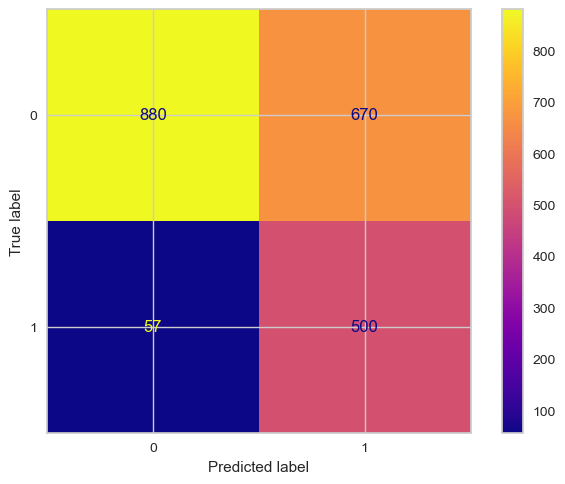

In [331]:
# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred = cb_tuned.predict(X_test)
y_train_pred = cb_tuned.predict(X_train)
y_pred_proba = cb_tuned.predict_proba(X_test)

eval_metric(cb_tuned, X_train, y_train, X_test, y_test) # to get the metrics for the model

In [332]:
cb_tuned_f1 = f1_score(y_test, y_pred)
cb_tuned_acc = accuracy_score(y_test, y_pred)
cb_tuned_recall = recall_score(y_test, y_pred)
cb_tuned_auc = roc_auc_score(y_test, y_pred)
cb_tuned_pre = precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
cb_tuned_recall_auc = auc(recall, precision)

train_val(y_train, y_train_pred, y_test, y_pred)

train_set  test_set
Accuracy        0.682     0.655
Precision       0.452     0.427
Recall          0.952     0.898
f1              0.613     0.579
roc_auc         0.769     0.733
recall_auc      0.676     0.676

In [333]:
CB_cm = confusion_matrix(y_test, y_pred)
CB_cm_df = pd.DataFrame(CB_cm)
CB_cm_df = CB_cm_df.rename(columns={0:"Not_Churn", 1:"Churn"}, index={0:"Not_Churn", 1:"Churn"})
CB_cm_df["Total"] = CB_cm_df["Not_Churn"] + CB_cm_df["Churn"]

In [334]:
fig = px.bar(CB_cm_df, x="Not_Churn", y="Churn", color = "Churn", title="CatBoost Confusion Matrix Distribution")

fig.update_layout(
    xaxis_title="Churn                         Not_Churn",
    yaxis_title="The Number of Subscriber",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

fig.show()

<IPython.core.display.Javascript object>

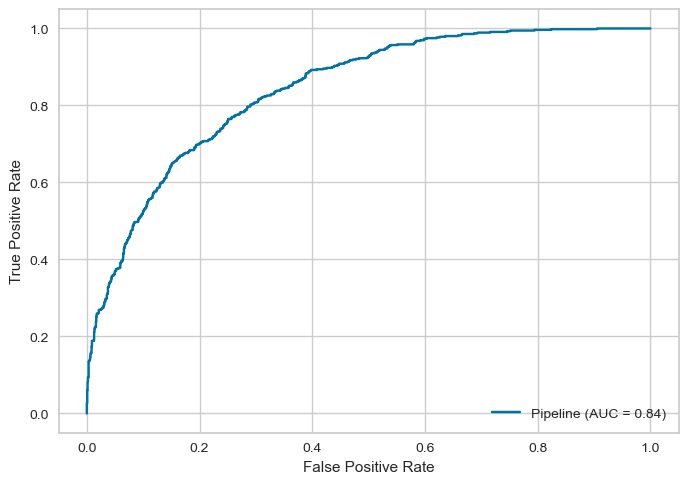

In [335]:
plot_roc_curve(cb_tuned, X_test, y_test);

In [336]:
# cprint('optimal_threshold for roc_curve','green', 'on_red')

# fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax(tp_rate - fp_rate)
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

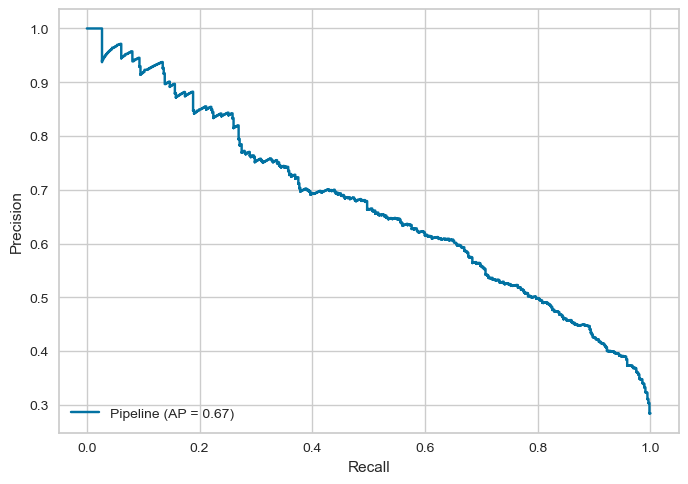

In [337]:
# cprint('precision_recall_curve','green', 'on_red')
plot_precision_recall_curve(cb_tuned, X_test, y_test);

In [338]:
# cprint('optimal_threshold for precision_recall_curve','green', 'on_red')

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# Cost-Sensitive Learning for Catboost, XGBoost, LightGBM


- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algorithm for the imbalanced data.

- **`scale_pos_weight`** is **1** by default.

- Both major class and minority class get the same weight.

- When dealing with imbalanced data, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

- For example, in our data;
     - Number of Non-churned customer:  5174
     - Number of Churned customer: 1869
     -  **`scale_pos_weight`** should get 5174 / 1869  which is almost **3**
     
- By adjusting the weight, minority class gets 3 times more impact and 3 times more correction than errors made on the majority class. 

- Two important point, 
    - by changing **`scale_pos_weight`** we can also see changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.



- https://www.kaggle.com/kaanboke/xgboost-lightgbm-catboost-imbalanced-data


### Default Parameters

In [339]:
# Kullanacağımız modeller nan değerlerle çalışabiliyor.
# Medianla doldurduğumuz nan'ları tekrar np.nan haline getiriyoruz


df.loc[nan_index,"TotalCharges"] = np.nan

X = df.drop("Churn", axis=1)
y = df["Churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: "['Churn'] not found in axis"

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols)
], remainder="passthrough")

### 7.2.4 Model Building

In [145]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [146]:
ohe = OneHotEncoder(sparse = False, 
                    handle_unknown = 'error', 
                    drop = "first")

column_trans = ColumnTransformer([("ohe", ohe, cat_cols)], remainder = "passthrough")

In [147]:
# sklearn library for machine learning algorithms, data preprocessing, pipeline and evaluation

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [148]:
scaler = StandardScaler() # will be used in the pipelines

## 7.1 Import Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, classification_report, roc_auc_score, f1_score

## 7.3 Modelling with Default Parameters

In [149]:
import xgboost as xgb

xgb.__version__

'0.90'

In [150]:
# !pip install xgboost==0.90

In [341]:
models = []

models.append(("LOG", LogisticRegression(random_state = 101, solver='liblinear')))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(random_state = 101)))
models.append(("DTC", DecisionTreeClassifier(random_state = 101)))
models.append(("RFC", RandomForestClassifier(random_state = 101)))
models.append(("ADA", AdaBoostClassifier(random_state = 101)))
models.append(("GBC", GradientBoostingClassifier(random_state = 101)))
models.append(("XGBC", XGBClassifier(random_state = 101, eval_metric='mlogloss')))
models.append(("LGBMC", LGBMClassifier(random_state = 101)))
models.append(("CBC", CatBoostClassifier(random_state = 101, silent = True)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", column_trans),
                     ("model", model)])
    
    kfold = StratifiedKFold(n_splits = 10, random_state = 101, shuffle = True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = "recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))    
    

result_df = pd.DataFrame(results, columns = [i for i in range(1, 11)], index = names).T

result_df.iplot(kind = "box", 
                boxpoints = "all", 
                title = "CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index = names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind = "barh", 
                                       title = f"{score} Score")

LOG: 0.5446
KNN: 0.4308
SVC: 0.0
DTC: 0.5069
RFC: 0.4854
ADA: 0.5277
GBC: 0.5331
XGBC: 0.5346
LGBMC: 0.5246
CBC: 0.5315


## 7.4 Modelling with Standart Scaler

In [157]:
models = []

models.append(("LOG", LogisticRegression(random_state = 101)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(random_state = 101)))
models.append(("DTC", DecisionTreeClassifier(random_state = 101)))
models.append(("RFC", RandomForestClassifier(random_state = 101)))
models.append(("ADA", AdaBoostClassifier(random_state = 101)))
models.append(("GBC", GradientBoostingClassifier(random_state = 101)))
models.append(("XGBC", XGBClassifier(random_state = 101, eval_metric ='mlogloss')))
models.append(("LGBMC", LGBMClassifier(random_state = 101)))
models.append(("CBC", CatBoostClassifier(random_state = 101, silent = True)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", column_trans),
                     ("scaler", scaler),
                     ("model", model)])    
    
    kfold = StratifiedKFold(n_splits = 10, random_state = 101, shuffle = True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = "recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))    
    

result_df = pd.DataFrame(results, columns = [i for i in range(1, 11)], index = names).T

result_df.iplot(kind = "box", 
                boxpoints = "all", 
                title = "CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index = names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind = "barh", 
                                       title = f"{score} Score")

<IPython.core.display.Javascript object>

LOG: 0.55


<IPython.core.display.Javascript object>

KNN: 0.5062


<IPython.core.display.Javascript object>

SVC: 0.5015


<IPython.core.display.Javascript object>

DTC: 0.5085


<IPython.core.display.Javascript object>

RFC: 0.4846


<IPython.core.display.Javascript object>

ADA: 0.5277


<IPython.core.display.Javascript object>

GBC: 0.5331


<IPython.core.display.Javascript object>

XGBC: 0.5338


<IPython.core.display.Javascript object>

LGBMC: 0.5331


<IPython.core.display.Javascript object>

CBC: 0.5315


## 7.5 Modelling with Parameter "class_weight = 'balanced'"

In [340]:
models = []
              
models.append(("LOG", LogisticRegression(random_state = 101, class_weight = "balanced", solver='liblinear')))
models.append(("KNN", KNeighborsClassifier(weights = 'uniform')))
models.append(("SVC", SVC(random_state = 101, class_weight = "balanced")))
models.append(("DTC", DecisionTreeClassifier(random_state = 101, class_weight = "balanced")))
models.append(("RFC", RandomForestClassifier(random_state = 101, class_weight = "balanced")))
models.append(("ADA", AdaBoostClassifier(random_state = 101)))
models.append(("GBC", GradientBoostingClassifier(random_state = 101)))
models.append(("XGBC", XGBClassifier(random_state = 101, eval_metric ='mlogloss', scale_pos_weight = 7)))
models.append(("LGBMC", LGBMClassifier(random_state = 101, class_weight = "balanced")))
models.append(("CBC", CatBoostClassifier(random_state = 101, silent = True, scale_pos_weight = 7)))
              
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", column_trans),
                     ("model", model)])              
    
    kfold = StratifiedKFold(n_splits = 10, random_state = 101, shuffle = True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = "recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))    
    

result_df = pd.DataFrame(results, columns = [i for i in range(1, 11)], index = names).T

result_df.iplot(kind = "box", 
                boxpoints = "all", 
                title = "CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index = names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind = "barh", 
                                       title = f"{score} Score")

LOG: 0.8008
KNN: 0.4308
SVC: 0.5469
DTC: 0.4854
RFC: 0.4877
ADA: 0.5277
GBC: 0.5331
XGBC: 0.9092
LGBMC: 0.7315
CBC: 0.8608


## 7.6 Modelling with Standart Scaler and Parameter "class_weight = 'balanced'"

In [159]:
models = []
              
models.append(("LOG", LogisticRegression(random_state = 101, class_weight = "balanced")))
models.append(("KNN", KNeighborsClassifier(weights = 'uniform')))
models.append(("SVC", SVC(random_state = 101, class_weight = "balanced")))
models.append(("DTC", DecisionTreeClassifier(random_state = 101, class_weight = "balanced")))
models.append(("RFC", RandomForestClassifier(random_state = 101, class_weight = "balanced")))
models.append(("ADA", AdaBoostClassifier(random_state = 101)))
models.append(("GBC", GradientBoostingClassifier(random_state = 101)))
models.append(("XGBC", XGBClassifier(random_state = 101, eval_metric ='mlogloss', scale_pos_weight = 7)))
models.append(("LGBMC", LGBMClassifier(random_state = 101, class_weight = "balanced")))
models.append(("CBC", CatBoostClassifier(random_state = 101, silent = True, scale_pos_weight = 7)))
              
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", column_trans),
                     ("scaler", scaler),
                     ("model", model)])              
    
    kfold = StratifiedKFold(n_splits = 10, random_state = 101, shuffle = True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = "recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))    

result_df = pd.DataFrame(results, columns = [i for i in range(1, 11)], index = names).T

result_df.iplot(kind = "box", 
                boxpoints = "all", 
                title = "CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index = names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind = "barh", 
                                       title = f"{score} Score")

<IPython.core.display.Javascript object>

LOG: 0.8015


<IPython.core.display.Javascript object>

KNN: 0.5062


<IPython.core.display.Javascript object>

SVC: 0.7808


<IPython.core.display.Javascript object>

DTC: 0.4862


<IPython.core.display.Javascript object>

RFC: 0.4869


<IPython.core.display.Javascript object>

ADA: 0.5277


<IPython.core.display.Javascript object>

GBC: 0.5331


<IPython.core.display.Javascript object>

XGBC: 0.9092


<IPython.core.display.Javascript object>

LGBMC: 0.7315


<IPython.core.display.Javascript object>

CBC: 0.8608


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>